## PROJECT 1 - DATA ANALYSIS AND MACHINE LEARNING COURSE (February, 2021)

Delgado Jessica, Karagianni Christina, Ruiz Vladmir, Selemon Deborah

Note: This notebook has been written following the framework of the questions proposed for the project.
https://compphysics.github.io/MLErasmus/doc/Projects/2021/Project1/html/Project1.html

## Regression analysis and resampling methods
The main aim of this project is to study in more detail various regression methods, including the Ordinary Least Squares (OLS) method and Ridge regression.The methods are in turn combined with resampling techniques like the bootstrap method and cross validation.We will first study how to fit polynomials to a specific two-dimensional function called Franke's function. We will also study in detail the so-called Bias-Variance trade off.

In [1]:
#Loading necessary libraries

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
import os
import csv
import re
import numpy as np
import pandas as pd
from IPython.display import display
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from pylab import plt, mpl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

We will first study how to fit polynomials to a specific two-dimensional function called Franke's function.

Note: Meshgrid is useful only in plotting the dataset, not in training the data

## Franke's  Function using arranged data

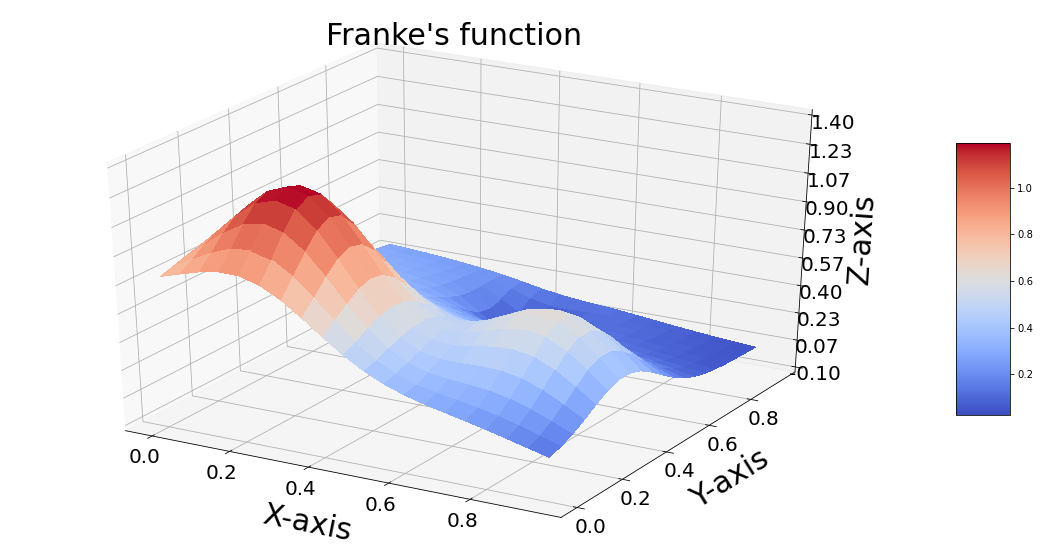

In [2]:
#Showing Franke's function using arranged data

# Make data
x_ = np.arange(0, 1, 0.05)
y_ = np.arange(0, 1, 0.05)
x1, y1 = np.meshgrid(x_,y_)

#Define function
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

#Call function
z1 = FrankeFunction(x1, y1)

# Plot the surface.
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.set_title("Franke's function", fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
#fig.savefig("Franke_function_general.jpg", dpi=300)
plt.show()

## Franke's Function with Noise using arranged data

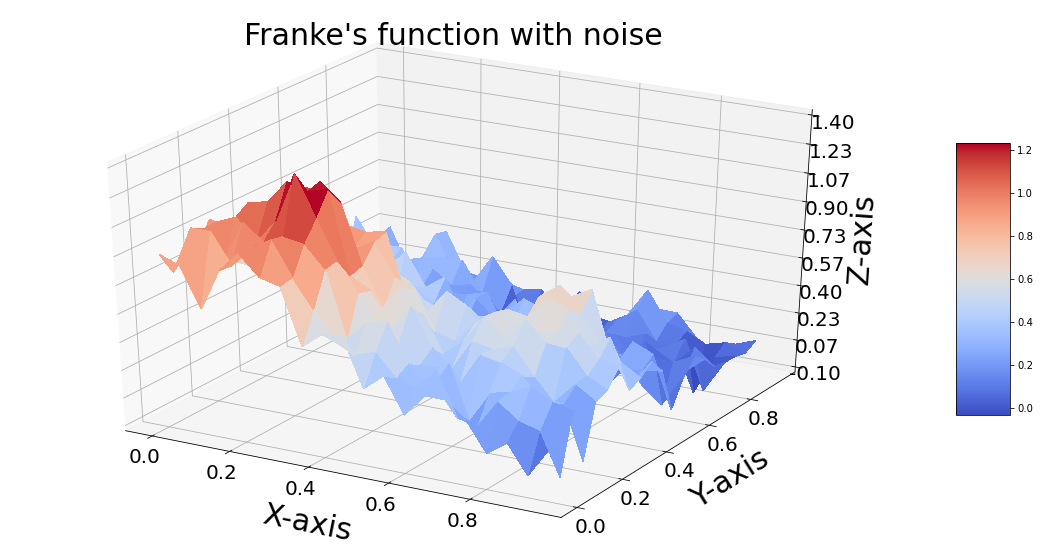

In [3]:
#Showing Franke's function with noise

# Make data
x_ = np.arange(0, 1, 0.05)
y_ = np.arange(0, 1, 0.05)
x1, y1 = np.meshgrid(x_,y_)

#Define function
def FrankeFunction_noise(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    mu,sigma = 0,0.1
    noise = mu + np.random.normal(0,sigma,len(x)*len(x))
    noise = noise.reshape(len(x),len(x))
    return term1 + term2 + term3 + term4 + noise

#Call function
z1 = FrankeFunction_noise(x1, y1)

# Plot the surface.
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.set_title("Franke's function with noise", fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
#fig.savefig("Franke_function_noised_general.jpg", dpi=300)
plt.show()

## Franke's function using random data

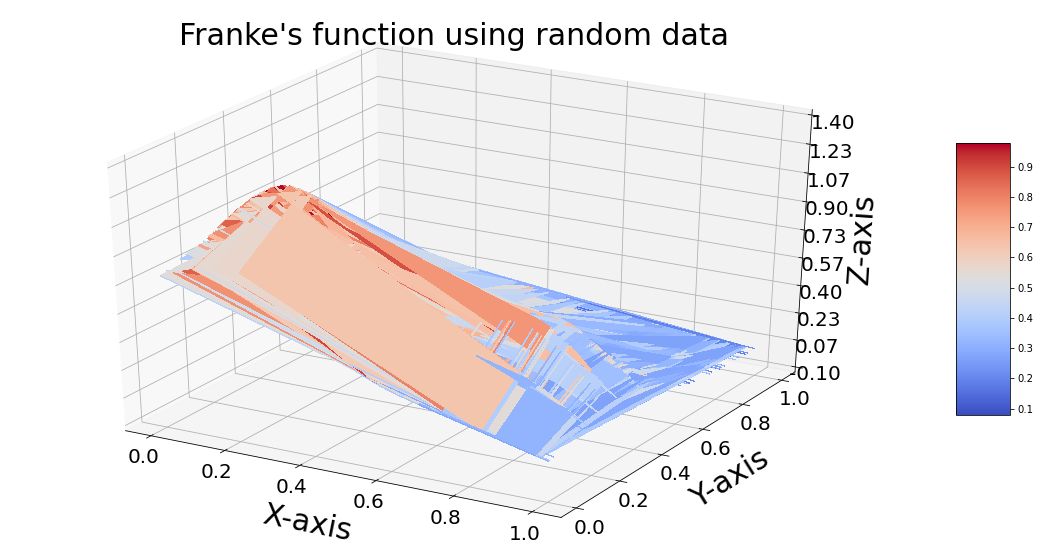

In [4]:
#Showing Franke's function using random data

#Make data
N = 100
np.random.seed(2018)
x2 = np.random.rand(N)
y2 = np.random.rand(N)
x2, y2 = np.meshgrid(x2,y2)

#Define function
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

#Call function
z2 = FrankeFunction(x2, y2)


# Plot the surface.
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.set_title("Franke's function using random data", fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
#fig.savefig("Franke_function_randdata.jpg", dpi=300)
plt.show()

## Franke's function with noise using random data

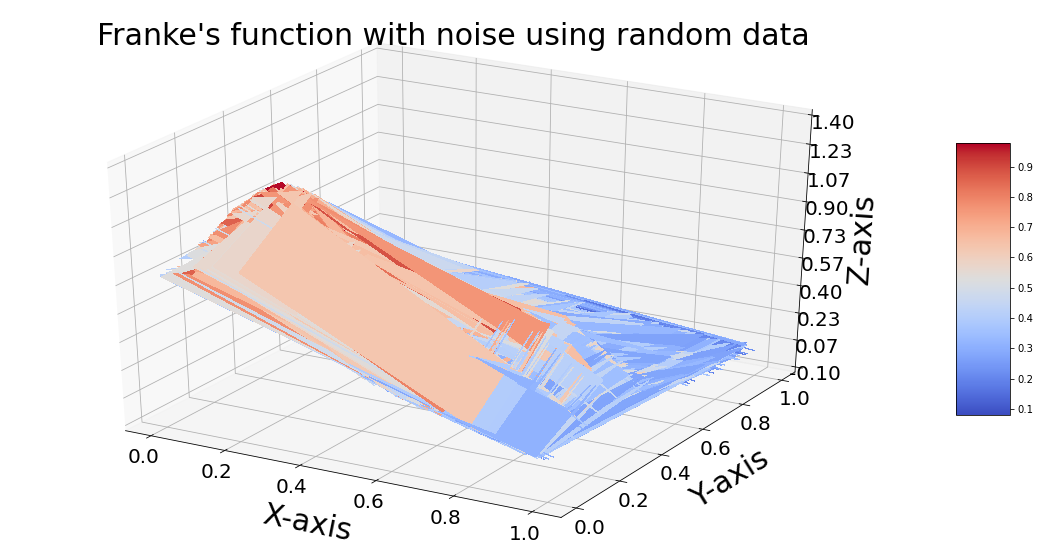

In [5]:
#Showing Franke's function with noise using random data

#Make data
N = 100
np.random.seed(2018)
x2 = np.random.rand(N)
y2 = np.random.rand(N)
x2, y2 = np.meshgrid(x2,y2)

#Define function
def FrankeFunction_noise(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    mu,sigma = 0,0.1
    noise = mu + sigma*np.random.normal(0,sigma,len(x)*len(x))
    noise = noise.reshape(len(x),len(x))
    return term1 + term2 + term3 + term4 + noise

#Call function
z2 = FrankeFunction_noise(x2, y2)


# Plot the surface.
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.set_title("Franke's function with noise using random data", fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
#fig.savefig("Franke_function_randdata_noised.jpg", dpi=300)
plt.show()

## Part a): Ordinary Least Square (OLS) on the Franke function
-Explore the addition of an added stochastic noise to the Franke function using the normal distribution N(0,1).

-Perform a standard least square regression analysis using polynomials in x and y up to fifth order.

-Find the confidence intervals of the parameters (estimators) β by computing their variances.

-Evaluate the Mean Squared error (MSE), R2 score.

Note: Your code should consider a scaling of the data and a split of the data in training and test data.

In [6]:
#Function to create the design matrix
def create_X(x, y, n ): #n= polynomail degree OR number of elements of beta 
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

#Defining functions for model assessment
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

(100,)
(100, 2)


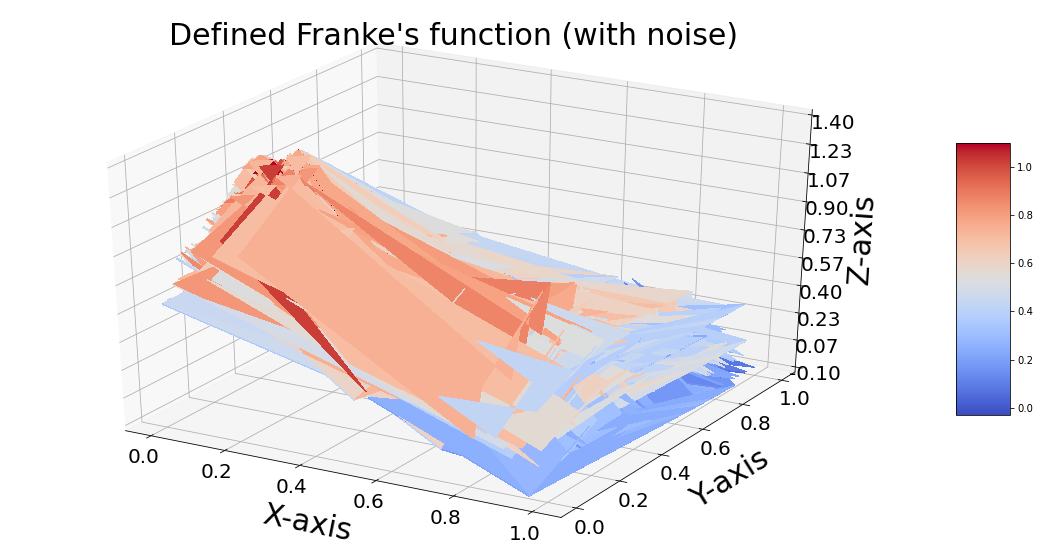

In [7]:
# Generating the dataset with x,y belonging in the interval [0,1]
N = 100
np.random.seed(2018) # A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
x = np.random.rand(100) # array with random samples from a uniform distribution over [0, 1).
y = np.random.rand(100)
vals = np.concatenate(([x],[y]), axis=0).T # Joins a sequence of arrays along an existing axis
print(np.shape(x))
print(np.shape(vals))

# Stochastic noise using the standard normal distribution N(0,1)
mu, sigma = 0,0.1 # sigma = standard deviation
datapoints = len(vals)
noise = mu + sigma*np.random.randn(datapoints)

# Defining the Franke function (with noise)
def FrankeFunction_noised(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    term5 = noise
    return term1 + term2 + term3 + term4 + term5

z = FrankeFunction_noised(x, y) #OR
z__= FrankeFunction(x,y)+ noise

#Plotting Franke's function
# Making Franke's function
x1,y1 = np.meshgrid(x,y) #defining x and y of meshgrid differently to be able to separate them from unmeshed x and y
z1 = FrankeFunction(x1,y1) + noise

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.set_title("Defined Franke's function (with noise)", fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
#fig.savefig("Defined_Franke_function.jpg", dpi=300)
plt.show()

OLS before splitting or scaling - USING SCIKIT LEARN FUNCTION

In [8]:
#Making DESIGN MATRIX
poly = PolynomialFeatures(5) # argument: polynomial degree
# Generates a new feature matrix consisting of all polynomial combinations of the features 
# with degree less than or equal to the specified degree
X = poly.fit_transform(vals) # Fit to data, then transform it.

# #ALTERNATIVE METHOD TO CREATE DESIGN MATRIX
#X = create_X(x,y, n=5) 

# OLS before splitting or scaling - USING SCIKIT LEARN FUNCTION
clf = skl.LinearRegression().fit(X, z) 
z_predict = clf.predict(X)

#results
mse_NoScale_NoSplit=mean_squared_error(z,z_predict)                                
r2_NoScale_NoSplit=r2_score(z,z_predict)

#printing outputs
print("Results of OLS Model BEFORE SPLITTING OR SCALING DATA")
print("---------------------------------------------------------")
print("R2 of OLS model before splitting or scaling data is: %.4f " % r2_NoScale_NoSplit)
print("MSE of OLS model before splitting or scaling data is: %.4f " % mse_NoScale_NoSplit)
#print(clf.coef_, clf.intercept_)
beta= clf.coef_
print("\nBeta values of OLS model before splitting or scaling data are: ", beta)

Results of OLS Model BEFORE SPLITTING OR SCALING DATA
---------------------------------------------------------
R2 of OLS model before splitting or scaling data is: 0.8805 
MSE of OLS model before splitting or scaling data is: 0.0113 

Beta values of OLS model before splitting or scaling data are:  [  0.          14.51357036   2.11738904 -72.50427092  -5.98449983
  -6.6379843  128.92897891  42.52232495  -4.9288998   -4.53580104
 -95.48065846 -72.5571532   24.93780924 -16.40461963  22.49815137
  24.50594829  30.34947913   5.82975764 -19.93503314  16.57992127
 -13.71206911]


OLS: Splitting Data (No Scale)

In [9]:
# Splitting data
X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)

# OLS before scaling - SCIKIT LEARN FUNCTION
clf = skl.LinearRegression().fit(X_train, z_train)
ztilde_test = clf.predict(X_test)
ztilde_train = clf.predict(X_train)

#OUTPUTS
r2_train_split_noScale = r2_score(z_train, ztilde_train)
mse_train_split_noScale = mean_squared_error(z_train, ztilde_train)
r2_test_split_noScale = r2_score(z_test, ztilde_test)
mse_test_split_noScale = mean_squared_error(z_test, ztilde_test)
print("Results of OLS Model AFTER SPLITTING DATA (NO SCALING)")
print("-------------------------------------------------------")
# The mean squared error                               
print("\nMean squared error of OLS on test data: %.4f" % mse_test_split_noScale )
# Explained variance score: 1 is perfect prediction                                 
print('Variance score (R2) of OLS test data: %.4f' % r2_test_split_noScale )
# Mean absolute error                                                           
print('Mean absolute error of OLS on test data: %.4f' % mean_absolute_error(z_test, ztilde_test))
#print(clf.coef_, clf.intercept_)
# The mean squared error                               
print("\nMean squared error of OLS on training data: %.4f" % mse_train_split_noScale)
# Explained variance score: 1 is perfect prediction                                 
print('Variance score (R2) of OLS on training data: %.4f' % r2_train_split_noScale)
# Mean absolute error                                                           
print('Mean absolute error of OLS on training data: %.4f' % mean_absolute_error(z_train, ztilde_train))
#print(clf.coef_, clf.intercept_)


#CALCULATING CONFIDENCE OF INTERVALS BEFORE SCALING - VARAINCE OF BETA
#Formula = Var[beta_ols]=σ2(XTX)-1
sigma2=np.var(noise)
var_betaols=sigma2*np.diagonal(np.linalg.inv(X_train.T @ X_train))
std = np.sqrt(var_betaols)
print('\nThe variance of Beta_OLS is: ',var_betaols)

Results of OLS Model AFTER SPLITTING DATA (NO SCALING)
-------------------------------------------------------

Mean squared error of OLS on test data: 0.0220
Variance score (R2) of OLS test data: 0.6856
Mean absolute error of OLS on test data: 0.1172

Mean squared error of OLS on training data: 0.0099
Variance score (R2) of OLS on training data: 0.9012
Mean absolute error of OLS on training data: 0.0808

The variance of Beta_OLS is:  [2.29292533e-01 1.33744899e+01 1.92346442e+01 2.88462151e+02
 2.74827516e+02 2.85630380e+02 1.51320037e+03 7.67702852e+02
 9.59686781e+02 1.24715111e+03 1.54332244e+03 5.78873050e+02
 9.25865087e+02 7.27793928e+02 1.27961999e+03 2.04324824e+02
 1.09219615e+02 2.06523228e+02 1.22194041e+02 1.10933726e+02
 1.88945253e+02]


OLS-Scaling and Splitting Data

Results of OLS Model AFTER SPLITTING AND SCALING DATA
-------------------------------

Mean squared error of OLS on test data: 0.0220
Variance score (R2) of OLS test data: 0.6856
Mean absolute error of OLS on test data: 0.1172

Mean squared error of OLS on training data: 0.0099
Variance score (R2) of OLS on training data: 0.9012
Mean absolute error of OLS on training data: 0.0808

CONFIDENCE INTERVALS
----------------------

The positive confidence interval is:  [  0.09385362   5.61359806   2.93874684 -19.44864869  -0.8355622
  -5.58137405  43.65682086  16.29835046   9.96068732  20.19652191
 -15.80308566  -7.83142693   6.83411031  -1.16734557  -1.28456289
   8.03043435   6.07173571   4.46728212   0.16893953   5.75858316
   4.50689734]

The negative confidence interval is:  [ -0.09385362   4.18000899   1.21953994 -26.10644472  -7.33410784
 -12.20641041  28.40806936   5.43702959  -2.18300691   6.35303143
 -31.20286163 -17.26286098  -5.09367795 -11.74258676 -15.30709927
   2.42709875   1.

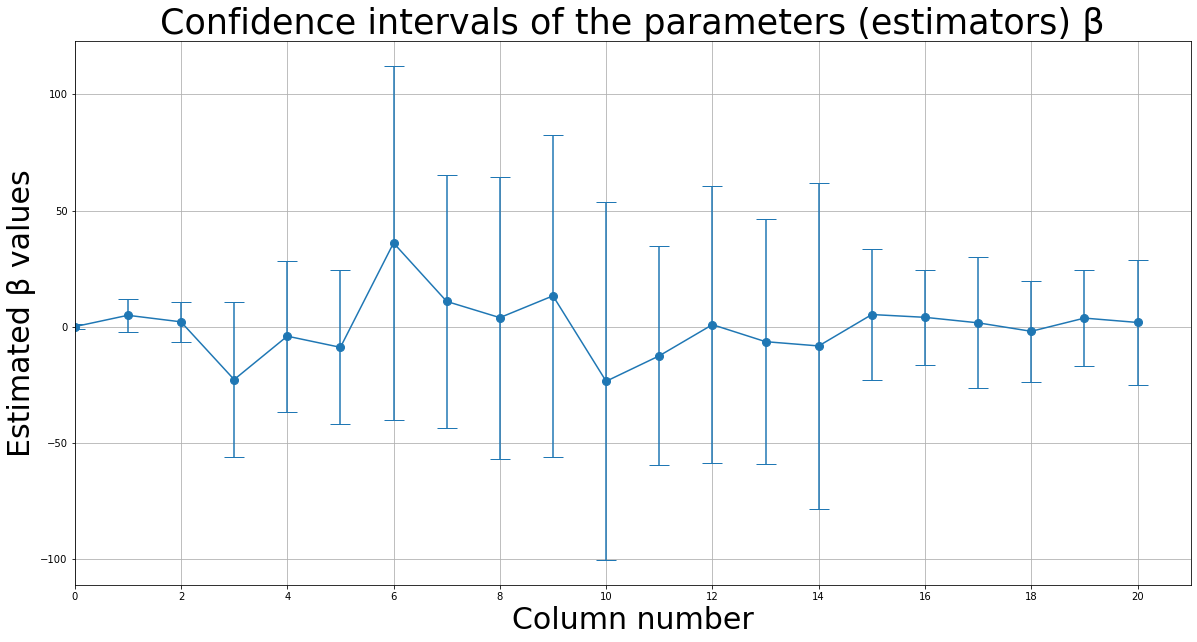

In [10]:
#Scaling data with STANDARD SCALE
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# OLS after scaling - SCIKIT LEARN FUNCTION
clf = skl.LinearRegression().fit(X_train_scaled, z_train)
ztilde_test_scaled = clf.predict(X_test_scaled)
ztilde_train_scaled = clf.predict(X_train_scaled)

#OUTPUTS
r2_train_split_scaled = r2_score(z_train, ztilde_train_scaled)
mse_train_split_scaled = mean_squared_error(z_train, ztilde_train_scaled)
r2_test_split_scaled = r2_score(z_test, ztilde_test_scaled)
mse_test_split_scaled = mean_squared_error(z_test, ztilde_test_scaled)
print("Results of OLS Model AFTER SPLITTING AND SCALING DATA")
print("-------------------------------")
# The mean squared error                               
print("\nMean squared error of OLS on test data: %.4f" % mse_test_split_scaled)
# Explained variance score: 1 is perfect prediction                                 
print('Variance score (R2) of OLS test data: %.4f' % r2_test_split_scaled)
# Mean absolute error                                                           
print('Mean absolute error of OLS on test data: %.4f' % mean_absolute_error(z_test, ztilde_test_scaled))
#print(clf.coef_, clf.intercept_)
# The mean squared error                               
print("\nMean squared error of OLS on training data: %.4f" % mse_train_split_scaled)
# Explained variance score: 1 is perfect prediction                                 
print('Variance score (R2) of OLS on training data: %.4f' % r2_train_split_scaled)
# Mean absolute error                                                           
print('Mean absolute error of OLS on training data: %.4f' % mean_absolute_error(z_train, ztilde_train_scaled))
#print(clf.coef_, clf.intercept_)

#CALCULATING CONFIDENCE OF INTERVALS AFTER SCALING- VARAINCE OF BETA SCALED
#Formula = Var[beta_ols]=σ2(XTX)-1
sigma_2=np.var(noise)
#sigma=0.01
var_betaols=sigma_2*np.diagonal(np.linalg.inv(X_train.T @ X_train))
std = np.sqrt(var_betaols)
# print('\nThe variance of scaled_beta_OLS is: ',var_betaols_scaled)

#GETTING THE CONFIDENCE INTERVALS FOR BETA
standard_error = np.sqrt(np.absolute(var_betaols))
conf_plus = clf.coef_ + (1.96*standard_error)/np.sqrt(100)
conf_minus = clf.coef_ - (1.96*standard_error)/np.sqrt(100) 
err = (1.96*standard_error)/np.sqrt(100)
print("\nCONFIDENCE INTERVALS")
print("----------------------")
print("\nThe positive confidence interval is: ",conf_plus)
print("\nThe negative confidence interval is: ",conf_minus)

a=list(range(0, 21))
beta = clf.coef_
fig1 = plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_xlim([0,21])
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.errorbar(a, beta, 1.96*std, fmt='-o', markersize=8, capsize=10)
plt.xlabel('Column number',size=30)
plt.ylabel('Estimated β values',fontsize=30)
plt.title('Confidence intervals of the parameters (estimators) β',fontsize=35)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
axes.grid(b=True, which='major', linestyle='-')
plt.setp(ax.spines.values(), color='k')
axes.set_facecolor('white')
#fig1.savefig('Confidence_intervals.jpg', dpi=150, facecolor='w', transparent=False)
plt.show()

In [11]:
#DISPLAYING R2 and MSE RESULTS IN DATAFRAME
import pandas as pd
from IPython.display import display
N= 'Nil'
variables = ['R2(all)', 'MSE(all)','R2(train)','MSE(train)','R2(test)','MSE(test)']
no_split_no_scale = [r2_NoScale_NoSplit, mse_NoScale_NoSplit,N, N, N, N ]
before_scaling = [N, N, r2_train_split_noScale, mse_train_split_noScale, r2_test_split_noScale, mse_test_split_noScale]
after_scaling = [N, N, r2_train_split_scaled, mse_train_split_scaled, r2_test_split_scaled, mse_test_split_scaled]
results = pd.DataFrame({'Variable':variables,'No_Split_No_Scale':no_split_no_scale,'Before Scaling': before_scaling, 'After Scaling':after_scaling})
print('\nThe results of our ordinary linear regression (OLS) model on the Franke function are: \n', results)

#DISPLAYING BETA AND ITS VARIANCE IN DATAFRAME
variance_results = pd.DataFrame({'Variance_unscaled': var_betaols})
print('\nThe variance of the beta values of our (OLS) model on the Franke function are: \n', variance_results)


The results of our ordinary linear regression (OLS) model on the Franke function are: 
      Variable No_Split_No_Scale Before Scaling After Scaling
0     R2(all)          0.880519            Nil           Nil
1    MSE(all)         0.0113213            Nil           Nil
2   R2(train)               Nil       0.901155      0.901155
3  MSE(train)               Nil     0.00994445    0.00994445
4    R2(test)               Nil       0.685589      0.685589
5   MSE(test)               Nil       0.021971      0.021971

The variance of the beta values of our (OLS) model on the Franke function are: 
     Variance_unscaled
0            0.229293
1           13.374490
2           19.234644
3          288.462151
4          274.827516
5          285.630380
6         1513.200374
7          767.702852
8          959.686781
9         1247.151113
10        1543.322442
11         578.873050
12         925.865087
13         727.793928
14        1279.619992
15         204.324824
16         109.219615
17    

## Part b): Bias-variance trade-off and resamplng techniques
Our aim here is to study the bias-variance trade-off by implementing the bootstrap resampling technique.
With a code which does OLS and includes resampling techniques, we will now discuss the bias-variance trade-off in the context of continuous predictions such as regression.

-Make first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to indicate possible regions of low/high bias and variance. You will most likely not get an equally smooth curve!

-Show that you can rewrite this as: .... Explain what the terms mean, which one is the bias and which one is the variance and discuss their interpretations.INSERT FROM LECTURE NOTES-DAY 3!!

-Perform then a bias-variance analysis of the Franke function by studying the MSE value as function of the complexity of your model.

-Plot the bias and variance trade-off, and evaluate how it depends on your model complexity, the number of data points, and possibly also the noise parameter.

Note: also that when you calculate the bias, in all applications you don't know the function values fi. You would hence replace them with the actual data points yi

## Making Fig2.11 HAstie et al figure

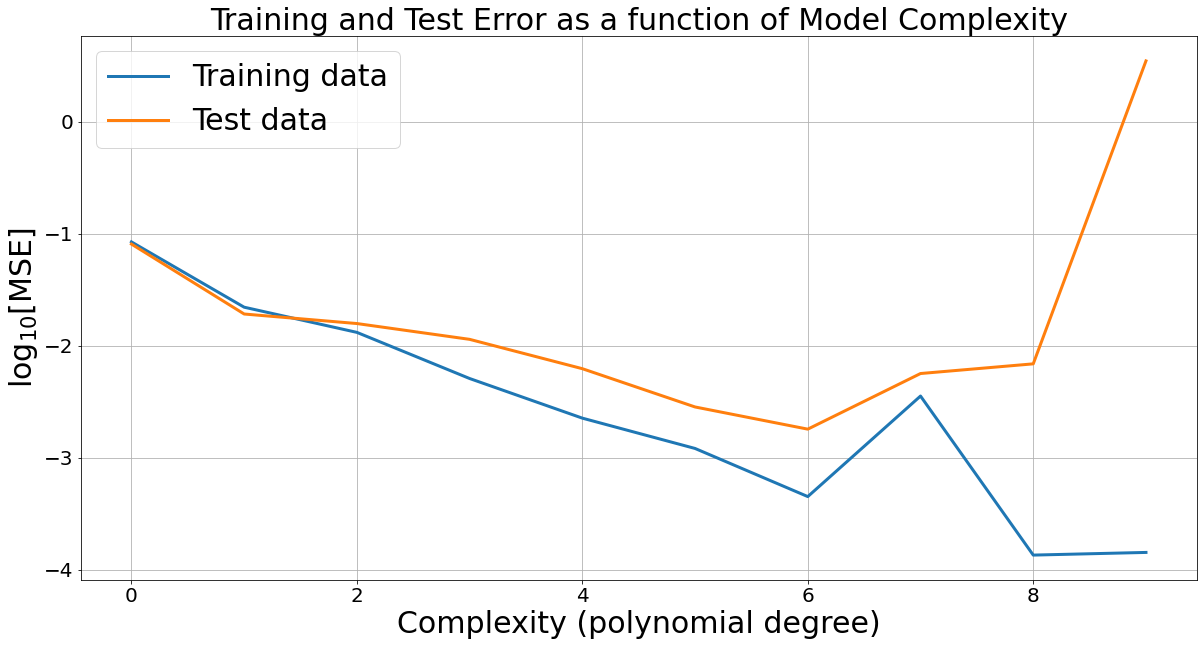

In [12]:
#Scaling and splitting of data included

#Generating dataset for a function FrankeFunction(x,y) with x,y∈[0,1)
N=100
x = np.random.rand(N) 
y = np.random.rand(N)

mu, sigma = 0,0.1
noise = mu + sigma*np.random.normal(0,sigma,len(x))

# Making Franke's function
z = FrankeFunction(x,y) + noise

Maxpolydegree = 10 #setting highest degree for polynomial
mse_test = np.zeros(Maxpolydegree)
mse_train = np.zeros(Maxpolydegree)
r2_test = np.zeros(Maxpolydegree)
r2_train = np.zeros(Maxpolydegree)
degrees=np.zeros(Maxpolydegree)

for degree in range(Maxpolydegree):
    degrees[degree] += degree
    X = create_X(x,y,degree) 
    X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2) #splitting data
    #scaling with STANDARD SCALER
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled[:,0] = 1 #to avoid singularity
    X_test_scaled[:,0] = 1 #to avoid singularity
    model = skl.LinearRegression().fit(X_train_scaled, z_train)
    z_pred_train = model.predict(X_train_scaled)
    z_pred_test = model.predict(X_test_scaled)
    #Results
    mse_test[degree] = mean_squared_error(z_test,z_pred_test)
    mse_train[degree] = mean_squared_error(z_train,z_pred_train) 
    r2_test[degree] = r2_score(z_test, z_pred_test)
    r2_train[degree] = r2_score(z_train, z_pred_train)

#     print("\nDegree of polynomial: %3d"% degree)
#     print("Mean squared error on training data: %.4f" % mse_train[degree])
#     print("Mean squared error on test data: %.4f" % mse_test[degree])

#PLOT TEST AND TRAINING ERROR VS COMPLEXITY
fig1 = plt.figure(figsize=(20,10))
axes = plt.gca()
#axes.set_xlim([0,12])
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(degrees, np.log10(mse_train), label='Training data',linewidth=3)
plt.plot(degrees, np.log10(mse_test), label='Test data',linewidth=3)
plt.xlabel('Complexity (polynomial degree)',fontsize=30)
plt.ylabel('log$_{10}$[MSE]',fontsize=30)
plt.title('Training and Test Error as a function of Model Complexity',fontsize=30)
plt.legend(fontsize=30)
plt.xticks(size = 20)
plt.yticks(size = 20)
axes.grid(b=True, which='major', linestyle='-')
fig1.savefig("OLS_rand__Training_Test_Error.jpg", facecolor='w', transparent=False, dpi=150)
plt.show()

<ipython-input-13-4a38c6e4c9c5>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(r2_train), label='Training R2(variance)')
<ipython-input-13-4a38c6e4c9c5>:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(degrees, np.log10(r2_test), label='Test R2(variance)')


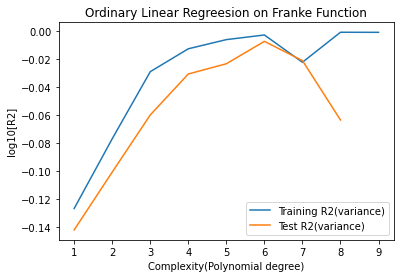

In [13]:
plt.plot(degrees, np.log10(r2_train), label='Training R2(variance)')
plt.plot(degrees, np.log10(r2_test), label='Test R2(variance)')
plt.xlabel('Complexity(Polynomial degree)')
plt.ylabel('log10[R2]')
plt.title('Ordinary Linear Regreesion on Franke Function')
plt.legend()
plt.show()

## Bias-Variance Trade off analysis with OLS


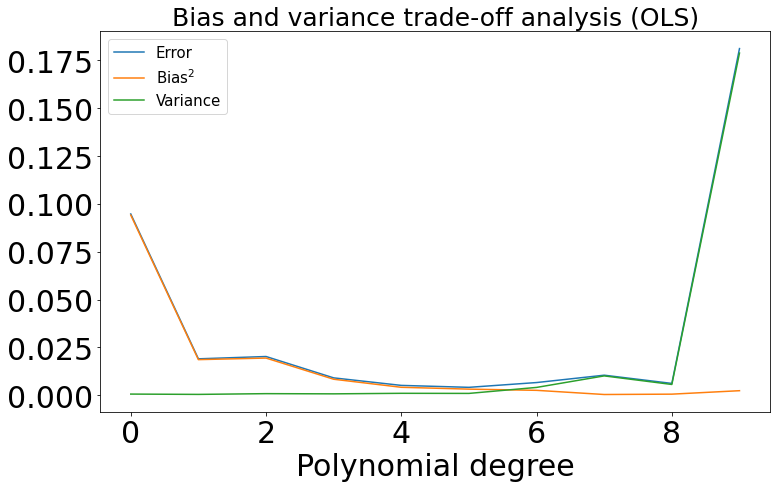

OBSERVATIONS
-------------------
The bias falls with increase in model complexity.
The MSE of test data and variance of the model increases with complexity.
Lower number od data points results in increased sensitivity of the model to complexity. Here, the MSE of the test data and variance of the model spike erratically
Increasing the number of datapoints yielded a milder sensitivity to the complexity of the model. The expected increase in MSE and variance was observed with very high complexities.
Noise has no effect in the trade-off


In [14]:
#Generating dataset for a function FrankeFunction(x,y) with x,y∈[0,1)
N=200
x = np.random.rand(N).reshape(-1,1)
y = np.random.rand(N).reshape(-1,1)

vals = np.concatenate(([x],[y]), axis=0).T
mu, sigma = 0,0.5
noise = mu + sigma*np.random.normal(0,sigma,len(vals))


# Making Franke's function
z = FrankeFunction(x,y) + noise

Maxpolydegree = 10 #setting highest degree for polynomial
n_bootstraps = 150
error_test = np.zeros(Maxpolydegree)
error_train = np.zeros(Maxpolydegree)
bias = np.zeros(Maxpolydegree)
variance = np.zeros(Maxpolydegree)
mse_test = np.zeros(Maxpolydegree)
mse_train = np.zeros(Maxpolydegree)
r2_test = np.zeros(Maxpolydegree)
r2_train = np.zeros(Maxpolydegree)
degrees=np.zeros(Maxpolydegree)

Maxpolydegree = 10 
n_bootstraps = 150
for degree in range(Maxpolydegree):
    X = create_X(x,y,degree)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
    z_pred = np.empty((z_test.shape[0], n_bootstraps))
    scaler = StandardScaler() 
    scaler.fit(X)
    X_scaled_test = scaler.transform(X_test)
    X_scaled_train = scaler.transform(X_train)
    for i in range(n_bootstraps):
        X_, z_ = resample(X_scaled_train, z_train)
        clf = skl.LinearRegression().fit(X_, z_)
        z_pred[:, i] = clf.predict(X_scaled_test).ravel()

    degrees[degree] = degree
    error_test[degree] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

#     print('\nPolynomial degree:', degree)
#     print('Error_test:', error_test[degree])
#     #print('Error_train:', error_train[degree])
#     print('Bias^2:', bias[degree])
#     print('Var:', variance[degree])
#     print('{} >= {} + {} = {}'.format(error_test[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

import pandas as pd
from IPython.display import display
results = pd.DataFrame({'degree':degrees,'error_test(bias+var)': error_test, 'bias     ':bias, ' variance': variance})
# print('\nThe results are: \n', results)

fig3 = plt.figure(figsize=(12,7))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(degrees, error_test, label='Error')
plt.plot(degrees, bias, label='Bias$^{2}$')
plt.plot(degrees, variance, label='Variance')
plt.xlabel('Polynomial degree',size=30)
plt.title('Bias and variance trade-off analysis (OLS)', fontsize = 25)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend(fontsize=15)
#fig3.savefig("OLS_bias-variance.jpg", dpi=150, facecolor='w', transparent=False)
plt.show()

print("OBSERVATIONS")
print("-------------------")
print("The bias falls with increase in model complexity.")
print("The MSE of test data and variance of the model increases with complexity.")
print("Lower number od data points results in increased sensitivity of the model to complexity. Here, the MSE of the test data and variance of the model spike erratically")
print("Increasing the number of datapoints yielded a milder sensitivity to the complexity of the model. The expected increase in MSE and variance was observed with very high complexities.")
print("Noise has no effect in the trade-off")

## Part c) Cross-validation as resampling techniques, adding more complexity

-Assess whether you should scale your data before the whole procedure, or during the procedure inbetween each split.

-Implement the k-fold cross-validation algorithm and evaluate again the MSE function resulting from the test folds. You can use the functionality of Scikit-Learn or even write your own code. Try 5−10 folds, comment on your results.

-Compare the MSE you get from your cross-validation code with the one you got from your bootstrap code. Comment your results

OBSERVTAIONS
----------------
The MSE increases with increase in model complexity as seen in earlier cases, across all k values tested
The MSE is consistent with that obtained from the bootstrap resampling technique as seen in the plot below.
The plot shows that the model works best with complexity in the order of 4-6 degree polynomials, and its efficiency reduces at lower complexities, and even more at higher complexities as seen in the CV curve


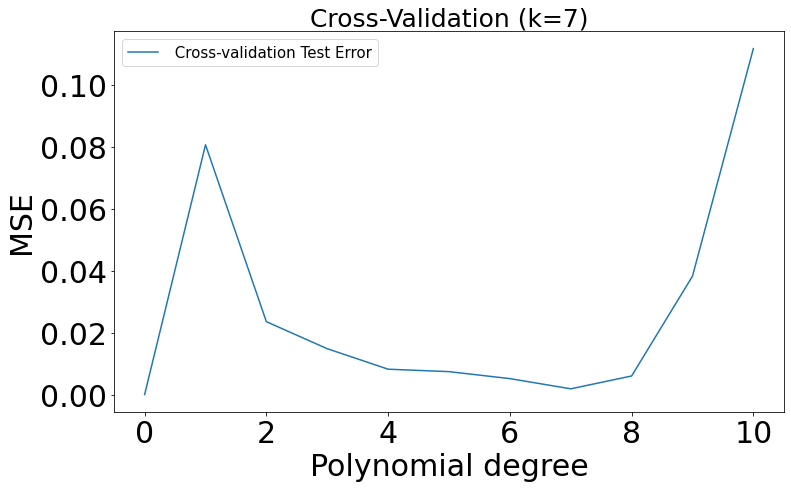

In [15]:
#RUN PREVIOUS BLOCK FOR PLOT IN THIS BLOCK TO SHOW

#Generating dataset for a function FrankeFunction(x,y) with x,y∈[0,1)
np.random.seed(2018)
N=80
x = np.random.rand(N)
y = np.random.rand(N)

vals = np.concatenate(([x],[y]), axis=0).T
mu, sigma = 0,0.1
noise = mu + sigma*np.random.normal(0,sigma,len(vals))

# Making Franke's function
z = FrankeFunction(x,y) + noise

# Cross-validation using cross_val_score from sklearn along with KFold
k = 7 # Initialize a KFold instance
kfold = KFold(n_splits = k)
Maxpolydegree = 11
degrees_ = np.zeros(Maxpolydegree)
estimated_mse_sklearn = np.zeros(Maxpolydegree)

for degree in range(1,Maxpolydegree):
    degrees_[degree]=degree
    for deg in range(degree):
        X = create_X(x,y,deg)
        scaler = StandardScaler()
        scaler.fit(X) 
        X_scaled = scaler.transform(X)
        OLS = LinearRegression()
    estimated_mse_folds = cross_val_score(OLS, X_scaled, z, scoring='neg_mean_squared_error', cv=kfold)
    estimated_mse_sklearn[degree] = np.mean(-estimated_mse_folds)

print("OBSERVTAIONS")
print("----------------")
print("The MSE increases with increase in model complexity as seen in earlier cases, across all k values tested")
print("The MSE is consistent with that obtained from the bootstrap resampling technique as seen in the plot below.")
print("The plot shows that the model works best with complexity in the order of 4-6 degree polynomials, and its efficiency reduces at lower complexities, and even more at higher complexities as seen in the CV curve")   
fig4 = plt.figure(figsize=(12,7))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
#plt.plot(degrees,  error_test, label='Bootstrap Test Error')
plt.plot(degrees_, estimated_mse_sklearn, label=' Cross-validation Test Error')
plt.xlabel('Polynomial degree',size=30)
plt.ylabel('MSE',size=30)
plt.title('Cross-Validation (k=%s)'%k, fontsize = 25)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend(fontsize=15)
#fig4.savefig("OLS_Bootstrap vs CV.jpg", dpi=150, facecolor='w', transparent=False)
fig4.savefig("OLS_CV.jpg",dpi=150, facecolor='w', transparent=False)
plt.show()

## Part d): Ridge Regression on the Franke function with resampling

-Perform the same bootstrap analysis as in the part b) (for the same polynomials) but now for different values of λ.

-Perform the same cross-validation analysis in part c) but now for different values of λ. Compare and analyze your results with those obtained in parts a-c). 

-Study the dependence on λ.

-Study also the bias-variance trade-off as function of various values of the parameter λ. For the bias-variance trade-off, use the bootstrap resampling method. 

-Comment your results.

## TEST VS TRAIN ERROR WITH RIDGE REGRESSION FOR DIFFERENT LAMBDA

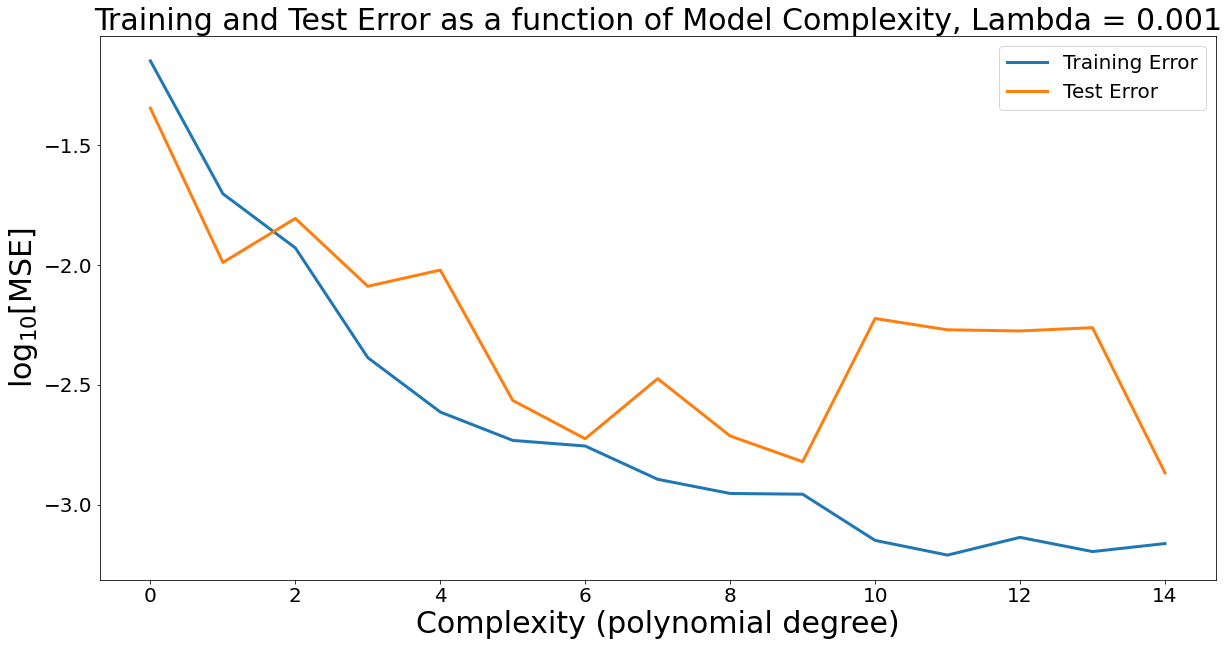

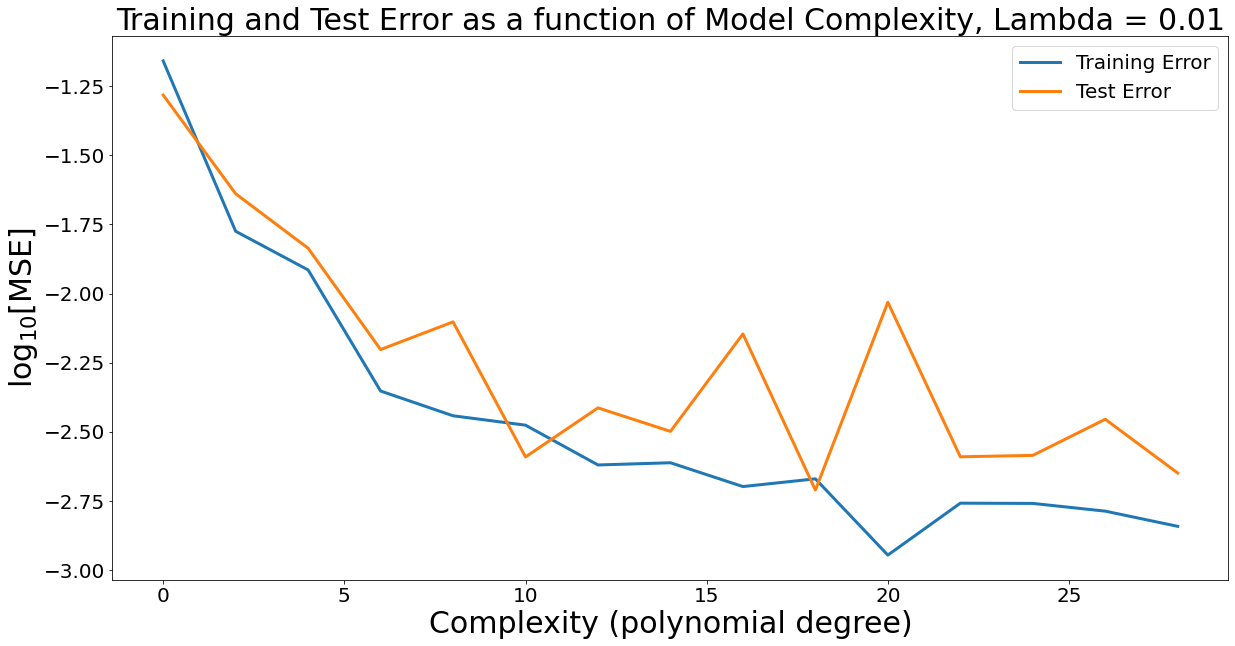

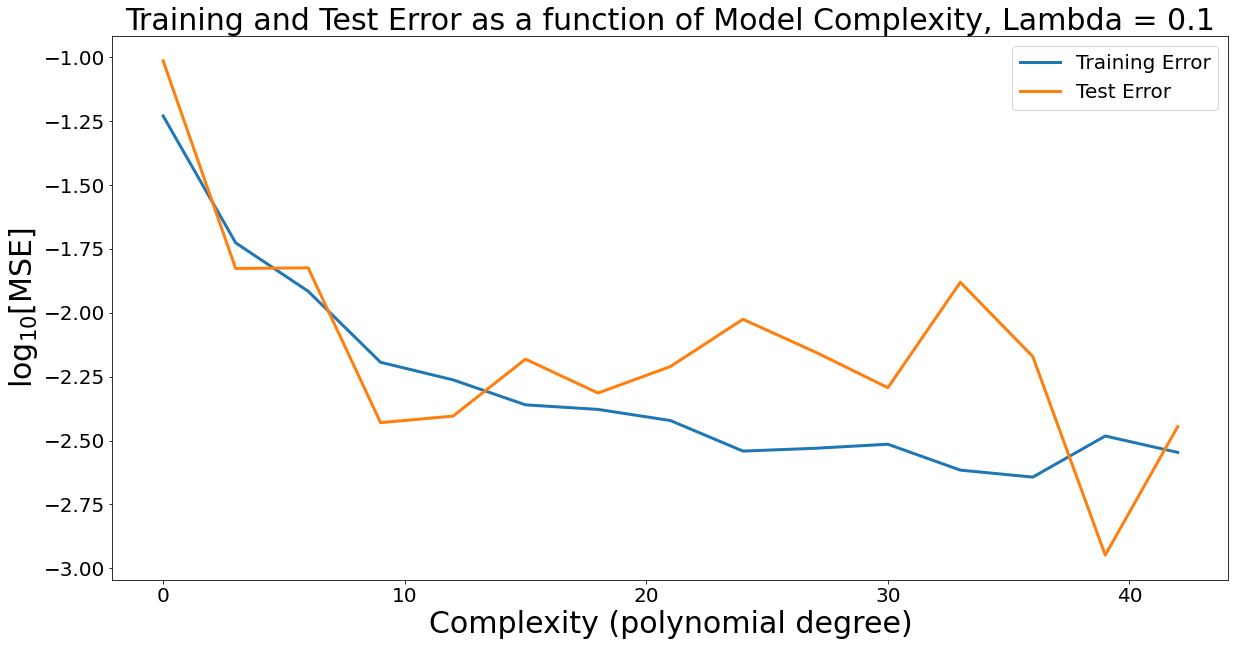

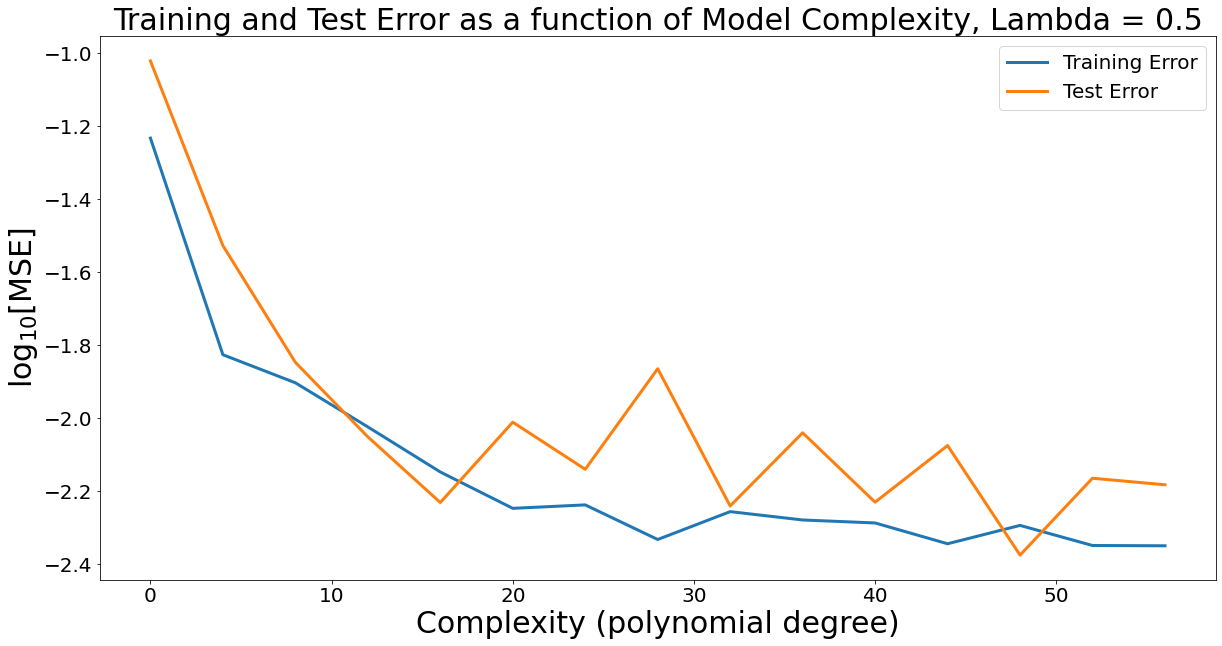

OBSERVATION
--------------
Lambda=0.001 returned best plot simlar to Fig. 3
The error in modelling the test data spikes increasingly and erratically with increase in the complexity of the model, while the training error decreases steadily 


In [16]:
#Scaling and splitting of data included

#Generating dataset for a function FrankeFunction(x,y) with x,y∈[0,1)
N=100
x = np.random.rand(N) 
y = np.random.rand(N)

mu, sigma = 0,0.1
noise = mu + sigma*np.random.normal(0,sigma,len(x))

# Making Franke's function
z = FrankeFunction(x,y) + noise

Maxpolydegree = 15 #setting highest degree for polynomial
lambdas = [0.001,0.01,0.1,0.5]
mse_test = np.zeros(Maxpolydegree)
mse_train = np.zeros(Maxpolydegree)
r2_test = np.zeros(Maxpolydegree)
r2_train = np.zeros(Maxpolydegree)
degrees=np.zeros(Maxpolydegree)

for lamb in lambdas:
    for degree in range(Maxpolydegree):
        degrees[degree] += degree
        X = create_X(x,y,degree) 
        X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2) #splitting data
        # with scaling with STANDARD SCALE
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train_scaled[:,0] = 1 #to avoid singularity
        X_test_scaled[:,0] = 1 #to avoid singularity
        ridge_model = skl.Ridge(alpha=lamb).fit(X_train_scaled, z_train)
        z_pred_train = ridge_model.predict(X_train_scaled)
        z_pred_test = ridge_model.predict(X_test_scaled)
        #Results
        mse_test[degree] = mean_squared_error(z_test,z_pred_test)
        mse_train[degree] = mean_squared_error(z_train,z_pred_train) 
        r2_test[degree] = r2_score(z_test, z_pred_test)
        r2_train[degree] = r2_score(z_train, z_pred_train)
        
#         print("\nLambda value: ", lamb)
#         print("\nDegree of polynomial: %3d"% degree)
#         print("Mean squared error on training data: %.4f" % mse_train[degree])
#         print("Mean squared error on test data: %.4f" % mse_test[degree])
        
    #PLOT TEST AND TRAINING ERROR VS COMPLEXITY
    fig1 = plt.figure(figsize=(20,10))
    axes = plt.gca()
    #axes.set_xlim([0,12])
    axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    plt.plot(degrees, np.log10(mse_train), label='Training Error',linewidth=3)
    plt.plot(degrees, np.log10(mse_test), label='Test Error',linewidth=3)
    plt.xlabel('Complexity (polynomial degree)',fontsize=30)
    plt.ylabel('log$_{10}$[MSE]',fontsize=30)
    plt.title('Training and Test Error as a function of Model Complexity, Lambda = %s'% lamb, fontsize=30)
    plt.legend(fontsize=20)
    fig1.savefig("Ridge_Train_Test_Error_%s .jpg"%lamb,dpi=150,facecolor='w', transparent=False)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    #axes.grid(b=True, which='major', linestyle='-')
    plt.show()
        
print("OBSERVATION") 
print("--------------")
print("Lambda=0.001 returned best plot simlar to Fig. 3")
print("The error in modelling the test data spikes increasingly and erratically with increase in the complexity of the model, while the training error decreases steadily ")

## Plot to show optimum lambda

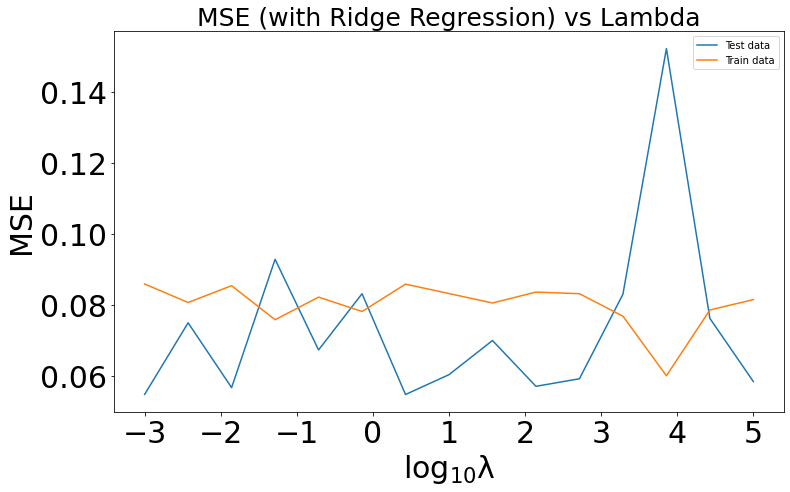

OBSERVTAIONS
----------------
The optimal lambda is that for which the MSE is the lowest. This is seen just before th epeak at 0.5. 


In [17]:
#Generating dataset for a function FrankeFunction(x,y) with x,y∈[0,1)
np.random.seed(2018)
N=100
x = np.random.rand(N)
y = np.random.rand(N)

vals = np.concatenate(([x],[y]), axis=0).T
mu, sigma = 0,0.1
noise = mu + sigma*np.random.normal(0,sigma,len(vals))


# Making Franke's function
z = FrankeFunction(x,y) + noise

# Cross-validation using cross_val_score from sklearn along with KFold
# Initialize a KFold instance

mse_test = np.zeros(Maxpolydegree)
nlambdas=15
lambdas = np.logspace(-3, 5, nlambdas)
X = create_X(x,y,degree)
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)
    
for lamb in lambdas:
    for degree in range(Maxpolydegree):
        degrees[degree] += degree
        X = create_X(x,y,degree) 
        X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2) #splitting data
        # with scaling with STANDARD SCALE
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train_scaled[:,0] = 1 #to avoid singularity
        X_test_scaled[:,0] = 1 #to avoid singularity
        ridge_model = skl.Ridge(alpha=lamb).fit(X_train_scaled, z_train)
        z_pred_train = ridge_model.predict(X_train_scaled)
        z_pred_test = ridge_model.predict(X_test_scaled)
        #Results
        mse_test[degree] = mean_squared_error(z_test,z_pred_test)
        mse_train[degree] = mean_squared_error(z_train,z_pred_train) 
        r2_test[degree] = r2_score(z_test, z_pred_test)
        r2_train[degree] = r2_score(z_train, z_pred_train)
        
fig4 = plt.figure(figsize=(12,7))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(np.log10(lambdas), mse_test,  label = 'Test data')
plt.plot(np.log10(lambdas), mse_train,  label = 'Train data')
plt.xlabel('log$_{10}$λ',size=30)
plt.ylabel('MSE',size=30)
plt.title('MSE (with Ridge Regression) vs Lambda', fontsize = 25)
#fig4.savefig("Ridge_optimal_lambda.jpg", dpi=150)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend()
plt.show()

print("OBSERVTAIONS")
print("----------------")
print("The optimal lambda is that for which the MSE is the lowest. This is seen just before th epeak at 0.5. ")

## BIAS-VARIANCE TRADE OFF BOOTSTRAPPING WITH RIDGE REGRESSION FOR DIFF LAMBDA

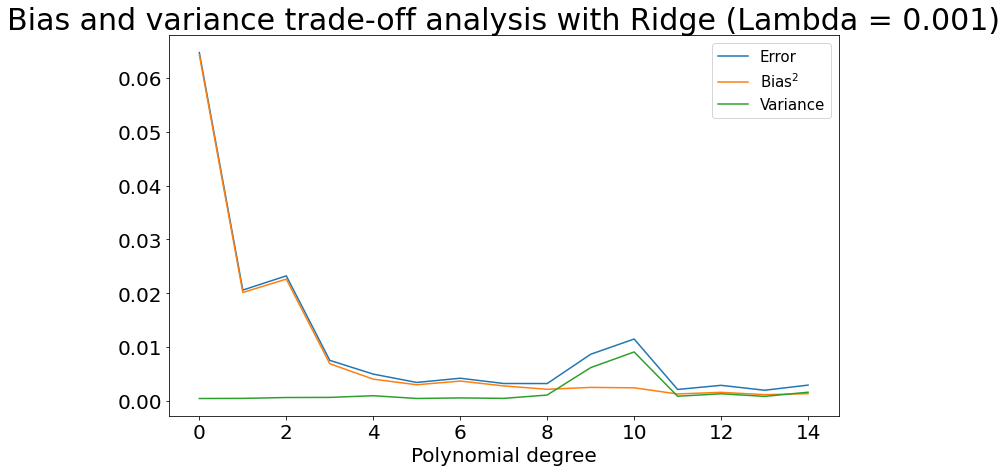

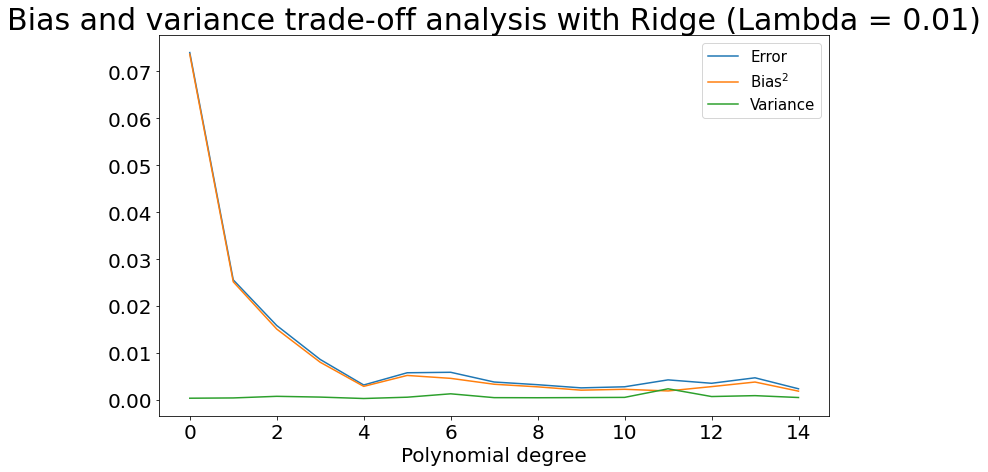

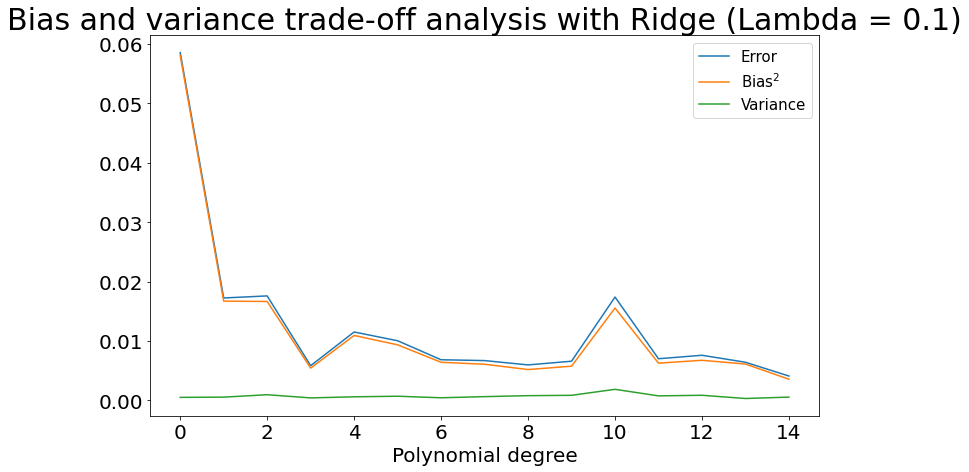

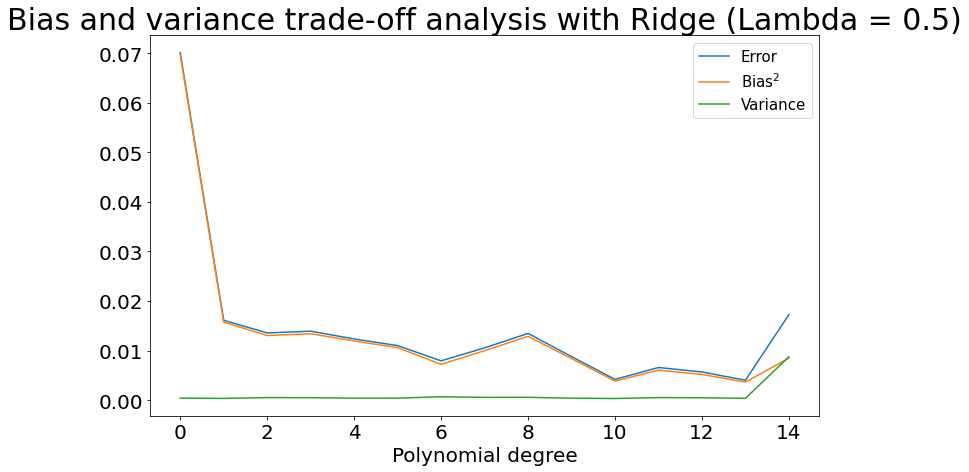

OBSERVATIONS
-------------------
The effect of lambda is negligible in the trade-off


In [18]:
#Generating dataset for a function FrankeFunction(x,y) with x,y∈[0,1)
N=200
x = np.random.rand(N).reshape(-1,1)
y = np.random.rand(N).reshape(-1,1)

vals = np.concatenate(([x],[y]), axis=0).T
mu, sigma = 0,0.5
noise = mu + sigma*np.random.normal(0,sigma,len(vals))


# Making Franke's function
z = FrankeFunction(x,y) + noise

Maxpolydegree = 15 #setting highest degree for polynomial
n_bootstraps = 150
error_test = np.zeros(Maxpolydegree)
error_train = np.zeros(Maxpolydegree)
bias = np.zeros(Maxpolydegree)
variance = np.zeros(Maxpolydegree)
mse_test = np.zeros(Maxpolydegree)
mse_train = np.zeros(Maxpolydegree)
r2_test = np.zeros(Maxpolydegree)
r2_train = np.zeros(Maxpolydegree)
degrees=np.zeros(Maxpolydegree)
lambdas = [0.001,0.01,0.1,0.5]

for lamb in lambdas:
    for degree in range(Maxpolydegree):
        X = create_X(x,y,degree)
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
        #print(np.shape(z_test))
        z_pred = np.empty((z_test.shape[0], n_bootstraps))
        scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
        scaler.fit(X)
        X_scaled_test = scaler.transform(X_test)
        X_scaled_train = scaler.transform(X_train)
        for i in range(n_bootstraps):
            X_, z_ = resample(X_scaled_train, z_train)
            clf_ridge = skl.Ridge(alpha=lamb).fit(X_, z_)
            z_pred[:, i] = clf_ridge.predict(X_scaled_test).ravel()


        degrees[degree] = degree
        error_test[degree] = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
        bias[degree] = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
        variance[degree] = np.mean( np.var(z_pred, axis=1, keepdims=True) )

#         print('\nPolynomial degree:', degree)
#         print('Error_test:', error_test[degree])
#         #print('Error_train:', error_train[degree])
#         print('Bias^2:', bias[degree])
#         print('Var:', variance[degree])
#         print('{} >= {} + {} = {}'.format(error_test[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

    fig3 = plt.figure(figsize=(12,7))
    axes = plt.gca()
    axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    plt.plot(degrees, error_test, label='Error')
    plt.plot(degrees, bias, label='Bias$^{2}$')
    plt.plot(degrees, variance, label='Variance')
    plt.xlabel('Polynomial degree',size=20)
    plt.title('Bias and variance trade-off analysis with Ridge (Lambda = %s)'%lamb, fontsize = 30)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(fontsize=15)
    fig3.savefig("Ridge_bias-variance_%s.jpg"%lamb, dpi=150)
    plt.show()
        
# import pandas as pd
# from IPython.display import display
# results = pd.DataFrame({'degree':degrees,'error_test(bias+var)': error_test, 'bias     ':bias, ' variance': variance})
# print('\nThe results are: \n', results)



print("OBSERVATIONS")
print("-------------------")
print("The effect of lambda is negligible in the trade-off")

## CROSS VALIDATION WITH RIDGE
MSE vs polynomial degree for fixed k value, showing plots for different lambda

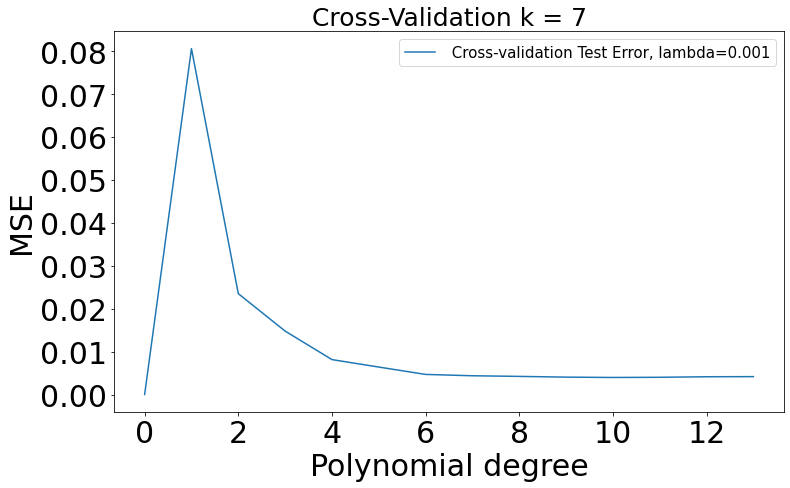

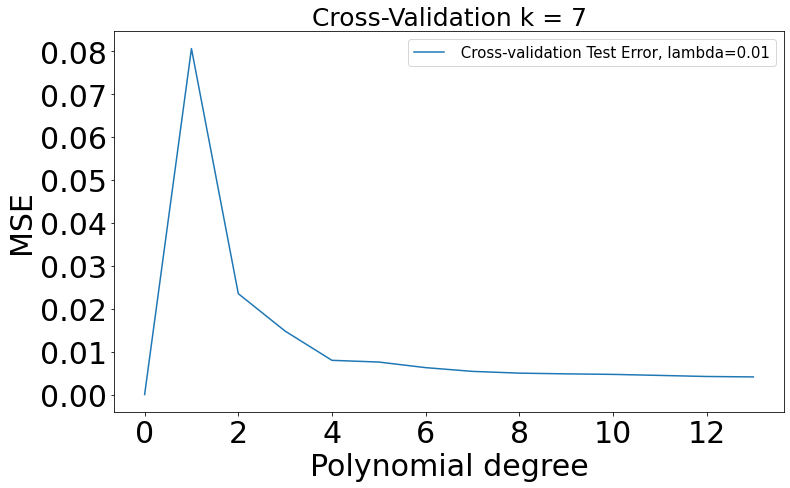

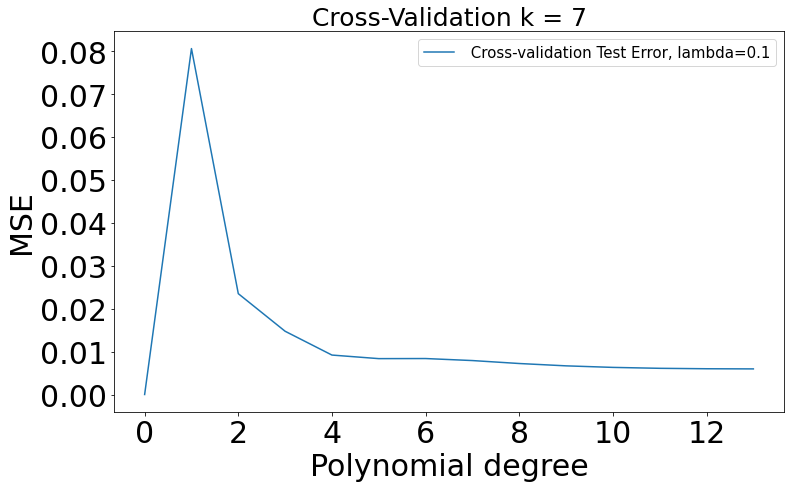

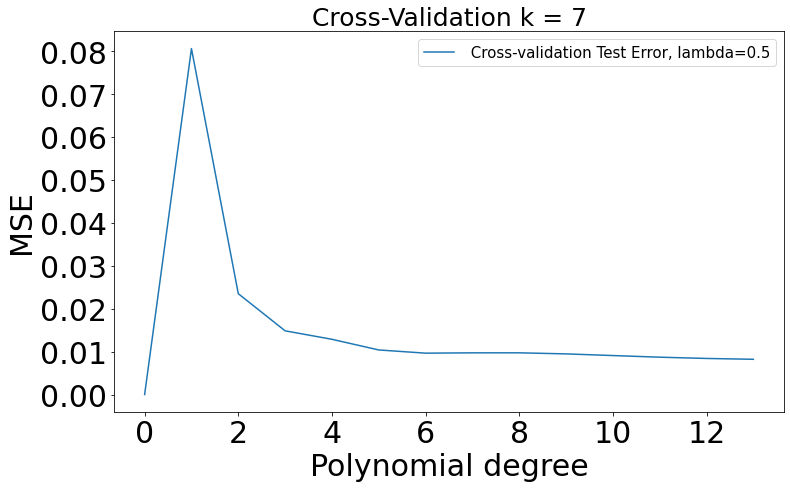

OBSERVTAIONS
----------------
The MSE increases with increase in model complexity as seen in earlier cases, across all k values tested


In [19]:
#Generating dataset for a function FrankeFunction(x,y) with x,y∈[0,1)
np.random.seed(2018)
N=80
x = np.random.rand(N)
y = np.random.rand(N)

vals = np.concatenate(([x],[y]), axis=0).T
mu, sigma = 0,0.1
noise = mu + sigma*np.random.normal(0,sigma,len(vals))


# Making Franke's function
z = FrankeFunction(x,y) + noise

# Cross-validation using cross_val_score from sklearn along with KFold
# Initialize a KFold instance
k = 7
kfold = KFold(n_splits = k)
Maxpolydegree = 14
degrees_ = np.zeros(Maxpolydegree)
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)
lambda_ = [0.001,0.01,0.1,0.5]
estimated_mse_sklearn = np.zeros(Maxpolydegree)


for lamb in lambda_:
    for degree in range(1,Maxpolydegree):
        degrees_[degree]=degree
        for deg in range(degree):
            X = create_X(x,y,deg)
            scaler = StandardScaler()
            scaler.fit(X) 
            X_scaled = scaler.transform(X)
            ridge = Ridge(alpha = lamb)
        estimated_mse_folds = cross_val_score(ridge, X_scaled, z, scoring='neg_mean_squared_error', cv=kfold)
        #[:, np.newaxis]
        # cross_val_score return an array containing the estimated negative mse for every fold.
        # we have to the the mean of every array in order to get an estimate of the mse of the model
        estimated_mse_sklearn[degree] = np.mean(-estimated_mse_folds)
        
    fig4 = plt.figure(figsize=(12,7))
    axes = plt.gca()
    axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    plt.plot(degrees_, estimated_mse_sklearn, label=' Cross-validation Test Error, lambda=%s'%lamb)
    plt.xlabel('Polynomial degree',size=30)
    plt.ylabel('MSE',size=30)
    plt.title('Cross-Validation k = %s'%k , fontsize = 25)
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.legend(fontsize=15)
    fig4.savefig("Ridge_CV_%s.jpg"%lamb, dpi=150)
    plt.show()

print("OBSERVTAIONS")
print("----------------")
print("The MSE increases with increase in model complexity as seen in earlier cases, across all k values tested")
    



## CROSS VALIDATION WITH RIDGE
MSE vs lambda for fixed k and fixed polynomial degree

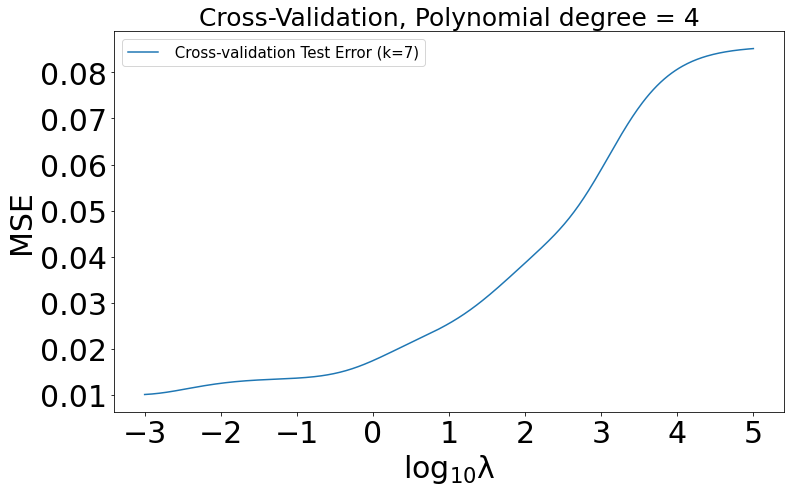

In [20]:
#Generating dataset for a function FrankeFunction(x,y) with x,y∈[0,1) 
np.random.seed(2018)
N=100
x = np.random.rand(N)
y = np.random.rand(N)

vals = np.concatenate(([x],[y]), axis=0).T
mu, sigma = 0,0.2
noise = mu + sigma*np.random.normal(0,sigma,len(vals))


# Making Franke's function
z = FrankeFunction(x,y) + noise

# Cross-validation using cross_val_score from sklearn along with KFold
# Initialize a KFold instance
degree = 4
k = 7
kfold = KFold(n_splits = k)
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)
estimated_mse_sklearn = np.zeros(nlambdas)
X = create_X(x,y,degree)
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

i=0
for lamb in lambdas:
    ridge = Ridge(alpha = lamb)
    estimated_mse_folds = cross_val_score(ridge, X_scaled, z, scoring='neg_mean_squared_error', cv=kfold)
    #[:, np.newaxis]
    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)
    i+=1
        
fig4 = plt.figure(figsize=(12,7))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(np.log10(lambdas), estimated_mse_sklearn, label=' Cross-validation Test Error (k=%s)'%k)
plt.xlabel('log$_{10}$λ',size=30)
plt.ylabel('MSE',size=30)
plt.title('Cross-Validation, Polynomial degree = %s'%degree , fontsize = 25)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.legend(fontsize=15)
#fig4.savefig("Ridge_rand_CV.jpg", dpi=150)
plt.show()

# print("OBSERVTAIONS")
# print("----------------")
# print("The MSE increases with increase in model complexity as seen in earlier cases, across all k values tested")

## Boston Hosuing Data Set
The features/predictors are
CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25000 square feet

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per USD10000

B:  1000(𝐵𝑘−0.63)2 , where  𝐵𝑘  is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in USD 1000s = TARGET!

## Part e): Introducing Real Data - The Boston housing data

There are 506 samples and 13 feature (predictor) variables in this data set. The objective is to predict the value of prices of the house using the features (predictors) listed here.

The dataset contains 13 features, and 1 target named 'MEDV'. The goal of this exercise is to perform polynomial regression, using both OLS and Ridge Regression in order to find the model that best predicts the 'MEDV' target value. As before we assess the quality of a model by using the MSE and the R2 score.

You will have to use scikit-learn's functionality to create your design matrix.

Note that previously we had a dependence on two original features (x,y), this time around we have 13 original features. Therefore, you will quickly run up the number of derived features as you increase complexity. This will sooner or later introduce you to an underdetermined system of equations, where you have more derived features than you have data(p>n). How does Ridge regression, or the pseudoinverse fit into this context?

The goal of this exercise is as stated earlier: Find the best model. To achieve this goal, vary your λ parameter, complexity, try different data-scaling methods, and even evaluate whether you need all 13 features(Feature Selection). A good starting point for the latter is to look at linear correlations asdefined by the correlation matrix.

You can try to remove features that have low correlation with the target, and evaluate to what degree it affects your metrics. You may also want to remove features that have high correlation with each other, this is up to you. 

Lastly, employ cross-validation as in part c) to assess how well your model(s) generalizes.

In [21]:
#Loading data
boston_dataset = load_boston() # boston_dataset is a dictionary
boston_dataset.keys() #checking what the dataset contains

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [22]:
#Invoking pandas
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
boston['MEDV'] = boston_dataset.target

In [23]:
#Pre-processing data
#check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


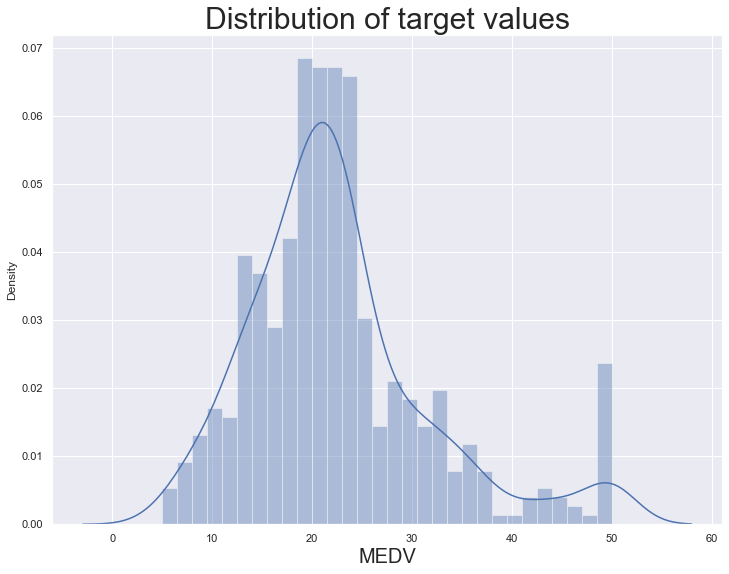

In [24]:
#visualizing the data
sns.set(rc={'figure.figsize':(12,9)}) # set the size of the figure

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=30)
plt.title("Distribution of target values", fontsize =30)
plt.xlabel('MEDV', fontsize =20)
#plt.savefig("Boston_target_values.jpg",dpi=150, facecolor ='w', transparent = False)
plt.show()

Text(0.5, 1.0, 'Correlation matrix')

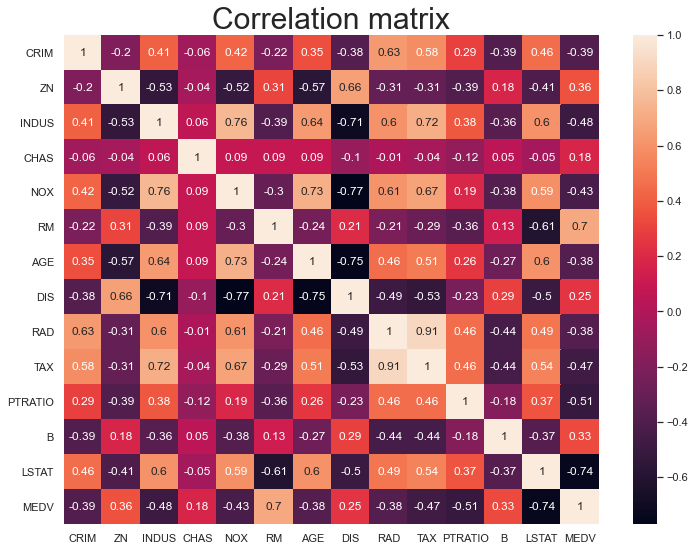

In [25]:
#Observing the correlation matrix

# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square
plt.title('Correlation matrix', fontsize =30)
#plt.savefig("Boston_correlation_matrix.jpg",dpi=150)

From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT and RM. We see also that RAD and TAX are stronly correlated, but we don't include this in our features together to avoid multi-colinearity

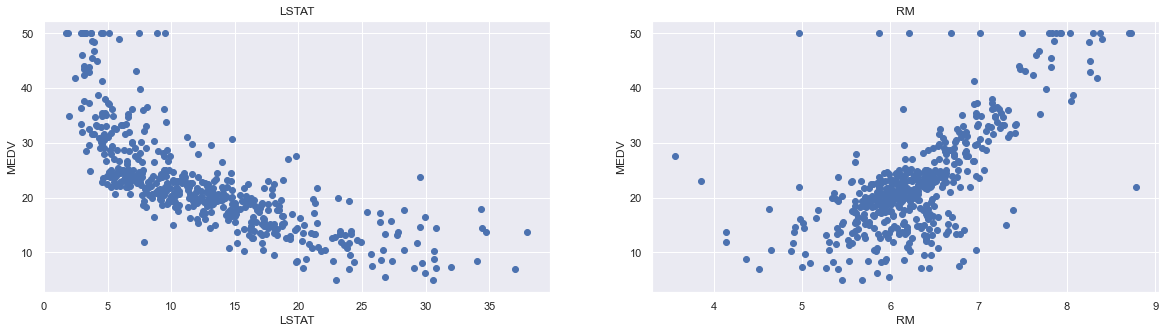

In [26]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.savefig("Boston_2feature_target_linearity_%s.jpg"%col, dpi=150)

In [27]:
#Training model

#input of only two highest correlating  features
x_2 = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM']) #choosing the highest correlated data to the target as the valid inputs

#input of four features
x_4 = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['INDUS'], boston['PTRATIO']], columns = ['LSTAT','RM','INDUS','PTRATIO'])

#input of all features, removing target
x_all = pd.DataFrame(boston, columns=boston.columns.difference(['MEDV']))

#Target
y_2 = boston['MEDV']
y_4 = boston['MEDV']
y_all = boston['MEDV'] #duplicating to write code for using all features in same code block

In [28]:
#Creating Design Matrix
degree = 2
poly = PolynomialFeatures(degree)
X_2 = poly.fit_transform(x_2) #using 2 features
X_4 = poly.fit_transform(x_4) #using 4 features
X_all = poly.fit_transform(x_all) #using all features except target 

print("Design matrix with 2 features as input (the highest correlated with the target)")
print("Data points: ", X_2.shape[0])
print("Derived features: ", X_2.shape[1])
print("\nDesign matrix with 4 features as input")
print("Data points: ", X_4.shape[0])
print("Derived features: ", X_4.shape[1])
print("\nDesign matrix with all 13 features as input")
print("Data points: ", X_all.shape[0])
print("Derived features: ", X_all.shape[1])

Design matrix with 2 features as input (the highest correlated with the target)
Data points:  506
Derived features:  6

Design matrix with 4 features as input
Data points:  506
Derived features:  15

Design matrix with all 13 features as input
Data points:  506
Derived features:  105


In [29]:
#Splitting the data into training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state=5)

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size = 0.2, random_state=5)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = 0.2, random_state=5)

# assigning random_state to any value ensures consistency.

In [30]:
#Scaling the data

scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
scaler.fit(X_train_2)
X_train_scaled_2 = scaler.transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
scaler.fit(X_train_4)
X_train_scaled_4 = scaler.transform(X_train_4)
X_test_scaled_4 = scaler.transform(X_test_4)

scaled = StandardScaler()
scaled.fit(X_train_all)
X_train_scaled_all = scaled.transform(X_train_all)
X_test_scaled_all = scaled.transform(X_test_all)

In [31]:
#OLS with SciKit-learn
OLS_2 = skl.LinearRegression().fit(X_train_scaled_2, y_train_2)
ytilde_train_2 = OLS_2.predict(X_train_scaled_2)
ytilde_test_2 = OLS_2.predict(X_test_scaled_2)

OLS_4 = skl.LinearRegression().fit(X_train_scaled_4, y_train_4)
ytilde_train_4 = OLS_4.predict(X_train_scaled_4)
ytilde_test_4 = OLS_4.predict(X_test_scaled_4)

OLS_all = skl.LinearRegression().fit(X_train_scaled_all, y_train_all)
ytilde_train_all = OLS_all.predict(X_train_scaled_all)
ytilde_test_all = OLS_all.predict(X_test_scaled_all)

In [32]:
#Defining OUTPUTS - OLS
MSE_train_2 = mean_squared_error(y_train_2, ytilde_train_2)
R2_train_2 = r2_score(y_train_2, ytilde_train_2)
MSE_test_2 = mean_squared_error(y_test_2, ytilde_test_2)
R2_test_2 = r2_score(y_test_2, ytilde_test_2)

MSE_train_4 = mean_squared_error(y_train_4, ytilde_train_4)
R2_train_4 = r2_score(y_train_4, ytilde_train_4)
MSE_test_4 = mean_squared_error(y_test_4, ytilde_test_4)
R2_test_4= r2_score(y_test_4, ytilde_test_4)

MSE_train_all = mean_squared_error(y_train_all, ytilde_train_all)
R2_train_all = r2_score(y_train_all, ytilde_train_all)
MSE_test_all = mean_squared_error(y_test_all, ytilde_test_all)
R2_test_all = r2_score(y_test_all, ytilde_test_all)

In [33]:
#Printing outputs - OLS
print("OLS Model performance with 2 features(LSTAT and RM) as input")
print("---------------------------------------------------------------")
print("\nMSE_train(2 features): ",MSE_train_2 )
print("R2_train(2 features): ",R2_train_2 )
print("\nMSE_test(2 features): ",MSE_test_2 )
print("R2_test(2 features): ",R2_test_2 )

print("\nOLS Model performance with 4 features(LSTAT, RM, INDUS, PTRATIO) as input")
print("---------------------------------------------------------------")
print("\nMSE_train(4 features): ",MSE_train_4 )
print("R2_train(4 features): ",R2_train_4 )
print("\nMSE_test(4 features): ",MSE_test_4 )
print("R2_test(4 features): ",R2_test_4 )

print("\nOLS Model performance with all 13 features as input")
print("---------------------------------------------------------------")
print("\nMSE_train(13 features): ", MSE_train_all)
print("R2_train(13 features): ",R2_train_all )
print("\nMSE_test(13 features): ",MSE_test_all )
print("R2_test(13 features): ", R2_test_all)

print("\nOBSERVATIONS")
print("--------------")
print("Using more features yielded lower MSE and higher R2 values")

OLS Model performance with 2 features(LSTAT and RM) as input
---------------------------------------------------------------

MSE_train(2 features):  22.118877092980934
R2_train(2 features):  0.7425094297364766

MSE_test(2 features):  14.324861558447493
R2_test(2 features):  0.8170372495892183

OLS Model performance with 4 features(LSTAT, RM, INDUS, PTRATIO) as input
---------------------------------------------------------------

MSE_train(4 features):  15.12257836235438
R2_train(4 features):  0.8239548368568348

MSE_test(4 features):  13.406165224268616
R2_test(4 features):  0.8287711995061406

OLS Model performance with all 13 features as input
---------------------------------------------------------------

MSE_train(13 features):  5.8793784367472135
R2_train(13 features):  0.9315569004651909

MSE_test(13 features):  10.21778902562568
R2_test(13 features):  0.8694943908799503

OBSERVATIONS
--------------
Using more features yielded lower MSE and higher R2 values


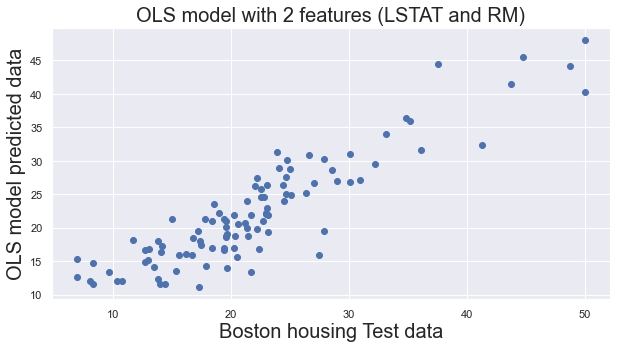

In [34]:
## Plotting outputs
plt.figure(figsize=(10, 5))
plt.scatter(y_test_2, ytilde_test_2)
plt.title('OLS model with 2 features (LSTAT and RM)',fontsize=20)
plt.xlabel('Boston housing Test data',fontsize=20)
plt.ylabel('OLS model predicted data',fontsize=20)
#plt.savefig('Boston_OLS_2features.jpg',dpi=150)
plt.show()

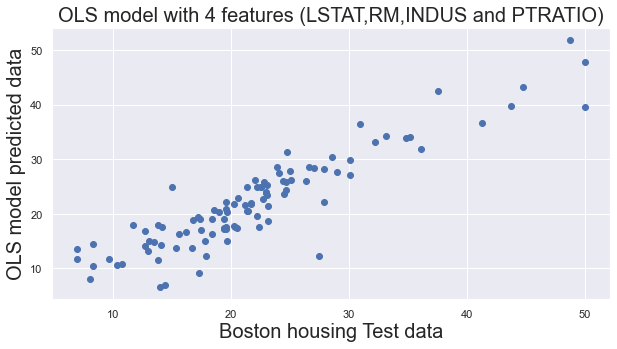

In [35]:
## Plotting outputs
plt.figure(figsize=(10, 5))
plt.scatter(y_test_4, ytilde_test_4)
plt.title('OLS model with 4 features (LSTAT,RM,INDUS and PTRATIO)',fontsize=20)
plt.xlabel('Boston housing Test data',fontsize=20)
plt.ylabel('OLS model predicted data',fontsize=20)
#plt.savefig('Boston_OLS_4features.jpg',dpi=150)
plt.show()

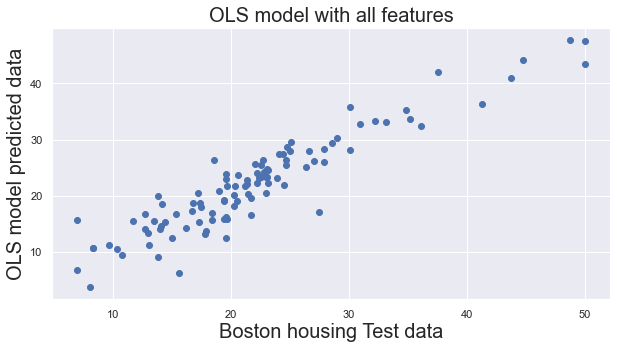

In [36]:
## Plotting outputs
plt.figure(figsize=(10, 5))
plt.scatter(y_test_all, ytilde_test_all)
plt.title('OLS model with all features',fontsize=20)
plt.xlabel('Boston housing Test data',fontsize=20)
plt.ylabel('OLS model predicted data',fontsize=20)
#plt.savefig('Boston_OLS_allfeatures.jpg',dpi=150)
plt.show()

## Plotting test and train error vs complexity
Two features

---------------------------------------------------------

Degree of polynomial:   1
Root Mean squared error on training data: 5.4897
Root Mean squared error on test data: 5.6600
---------------------------------------------------------

Degree of polynomial:   2
Root Mean squared error on training data: 4.5130
Root Mean squared error on test data: 4.6148
---------------------------------------------------------

Degree of polynomial:   3
Root Mean squared error on training data: 4.3452
Root Mean squared error on test data: 5.0848
---------------------------------------------------------

Degree of polynomial:   4
Root Mean squared error on training data: 4.1128
Root Mean squared error on test data: 5.5591
---------------------------------------------------------

Degree of polynomial:   5
Root Mean squared error on training data: 4.0237
Root Mean squared error on test data: 6.5391
---------------------------------------------------------

Degree of polynomial:   6
Root Mean squared er

<ipython-input-37-ffad562e5705>:58: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_train_2), label='Training Error',linewidth=3)
<ipython-input-37-ffad562e5705>:59: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_test_2), label='Test Error',linewidth=3)


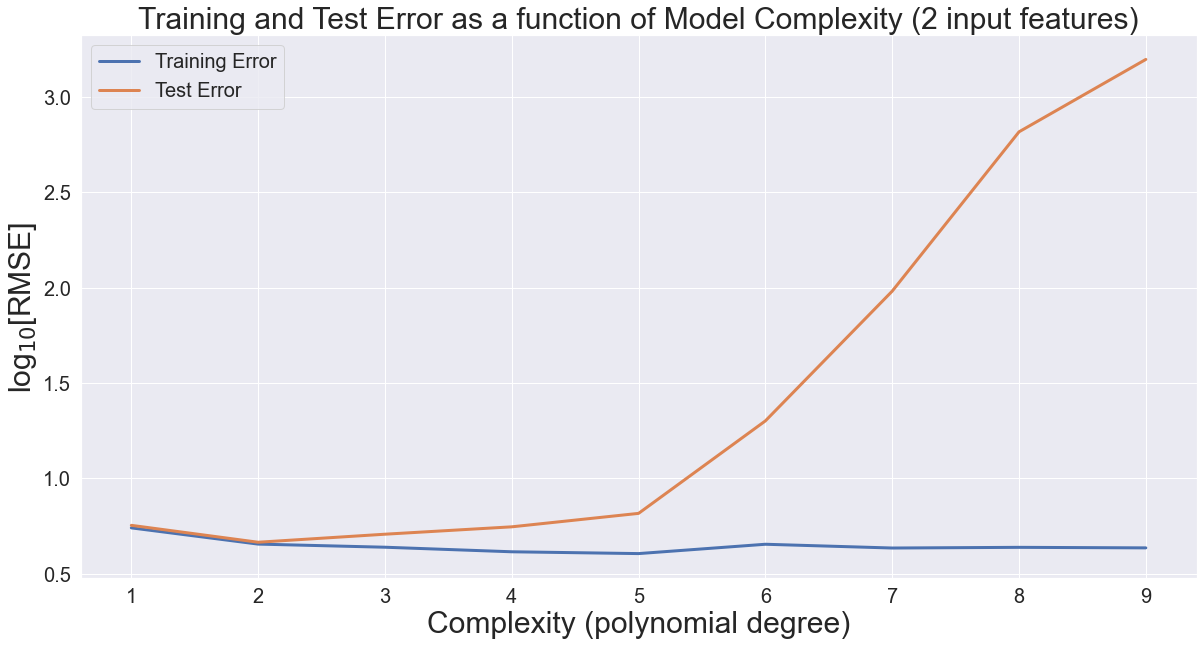

In [37]:
#plotting test an dtrain error vs compexity (2 features)

Maxpolydegree = 10 #setting highest degree for polynomial
trials =100
degrees=np.zeros(Maxpolydegree)

mse_test_2 = np.zeros(Maxpolydegree)
mse_train_2 = np.zeros(Maxpolydegree)
r2_test_2 = np.zeros(Maxpolydegree)
r2_train_2 = np.zeros(Maxpolydegree)

for degree in range(1,Maxpolydegree):
    degrees[degree] += degree
    poly = PolynomialFeatures(degree)
    X_2_ = poly.fit_transform(x_2) 
    
    # loop over trials in order to estimate the expectation value of the MSE
    mse_test_2[degree] = 0.0
    mse_train_2[degree] = 0.0
    r2_test_2[degree] = 0.0
    r2_train_2[degree] = 0.0
    
    for samples in range(trials):
        X_train_2_, X_test_2_, y_train_2_, y_test_2_ = train_test_split(X_2_ , y_2 , test_size=0.2) #splitting data
        
        #scaling with STANDARD SCALE
        scaler = StandardScaler()
        scaler.fit(X_train_2_)
        X_train_scaled_2_ = scaler.transform(X_train_2_)
        X_test_scaled_2_ = scaler.transform(X_test_2_)
        OLS_2_ = skl.LinearRegression().fit(X_train_scaled_2_, y_train_2_)
        ytilde_train_2_ = OLS_2_.predict(X_train_scaled_2_)
        ytilde_test_2_ = OLS_2_.predict(X_test_scaled_2_)
        
        #Computing Results
        mse_test_2[degree] += (np.sqrt(mean_squared_error(y_test_2_, ytilde_test_2_)))
        mse_train_2[degree] += (np.sqrt(mean_squared_error(y_train_2_, ytilde_train_2_)))
        r2_test_2[degree] += r2_score(y_test_2_, ytilde_test_2_)
        r2_train_2[degree] += r2_score(y_train_2_, ytilde_train_2_)
        
    #final result = expected/mean value    
    mse_test_2[degree] /= trials
    mse_train_2[degree] /= trials
    r2_test_2[degree] /= trials
    r2_train_2[degree] /= trials
    
    #printing results
    #print("MODEL PERFORMANCE WITH TWO INPUT FEATURES (LSTAT AND RM)")
    print("---------------------------------------------------------")
    print("\nDegree of polynomial: %3d"% degree)
    print("Root Mean squared error on training data: %.4f" % mse_train_2[degree])
    print("Root Mean squared error on test data: %.4f" % mse_test_2[degree])

fig_2 = plt.figure(figsize=(20,10))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(degrees, np.log10(mse_train_2), label='Training Error',linewidth=3)
plt.plot(degrees, np.log10(mse_test_2), label='Test Error',linewidth=3)
plt.xlabel('Complexity (polynomial degree)',fontsize=30)
plt.ylabel('log$_{10}$[RMSE]',fontsize=30)
plt.title('Training and Test Error as a function of Model Complexity (2 input features)',fontsize=30)
fig_2.savefig("Boston_OLS_2_Train_Test_Error.jpg",dpi=150)
plt.legend(fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

<ipython-input-38-cedfa5c6cd24>:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(r2_train_2), label='Training R2',linewidth=3)
<ipython-input-38-cedfa5c6cd24>:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(r2_test_2), label='Test R2',linewidth=3)
<ipython-input-38-cedfa5c6cd24>:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(degrees, np.log10(r2_test_2), label='Test R2',linewidth=3)


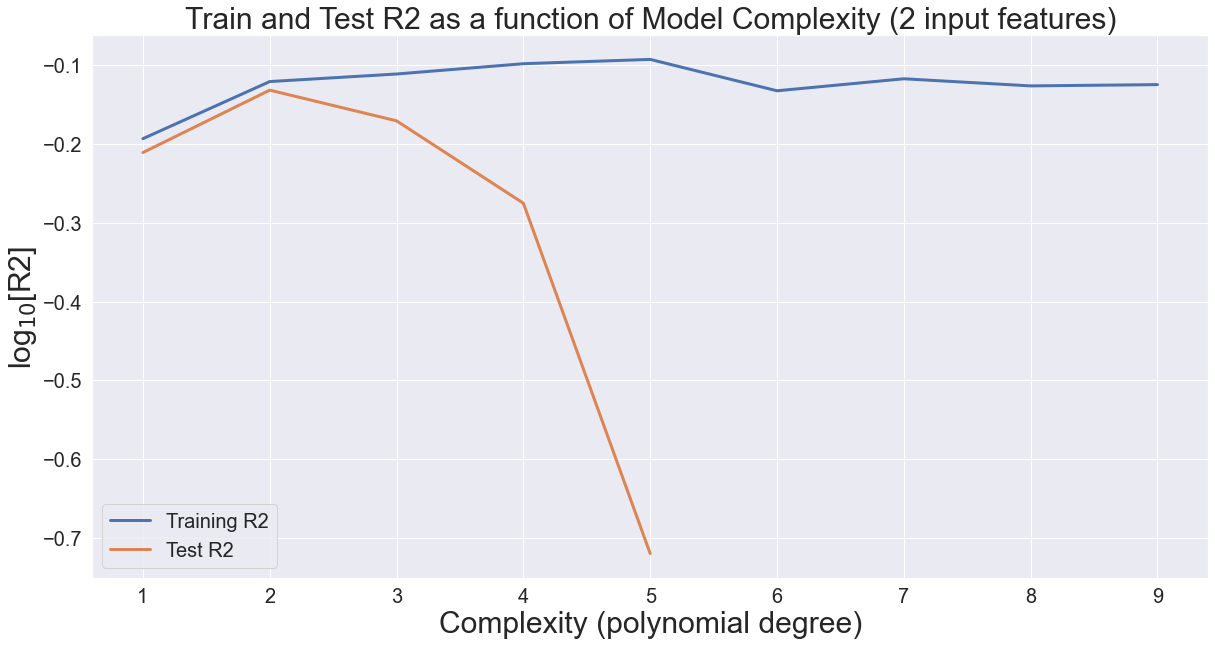

In [38]:
fig_2 = plt.figure(figsize=(20,10))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(degrees, np.log10(r2_train_2), label='Training R2',linewidth=3)
plt.plot(degrees, np.log10(r2_test_2), label='Test R2',linewidth=3)
plt.xlabel('Complexity (polynomial degree)',fontsize=30)
plt.ylabel('log$_{10}$[R2]',fontsize=30)
plt.title('Train and Test R2 as a function of Model Complexity (2 input features)',fontsize=30)
plt.legend(fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
#fig_2.savefig("Boston_OLS_2_Train_Test_R2.jpg",dpi=150)
plt.show()

## Plotting test and train error vs complexity
Using 4  features : LSTAT, RM, INDUS and PTRATIO

---------------------------------------------------------

Degree of polynomial:   1
Root Mean squared error on training data: 5.1735
Root Mean squared error on test data: 5.3557
---------------------------------------------------------

Degree of polynomial:   2
Root Mean squared error on training data: 3.7821
Root Mean squared error on test data: 4.1157
---------------------------------------------------------

Degree of polynomial:   3
Root Mean squared error on training data: 4.0659
Root Mean squared error on test data: 4.6236
---------------------------------------------------------

Degree of polynomial:   4
Root Mean squared error on training data: 3.4752
Root Mean squared error on test data: 5.2089
---------------------------------------------------------

Degree of polynomial:   5
Root Mean squared error on training data: 3.3612
Root Mean squared error on test data: 17.2290
---------------------------------------------------------

Degree of polynomial:   6
Root Mean squared e

<ipython-input-39-f5533f175142>:58: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_train_4), label='Training Error',linewidth=3)
<ipython-input-39-f5533f175142>:59: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_test_4), label='Test Error',linewidth=3)


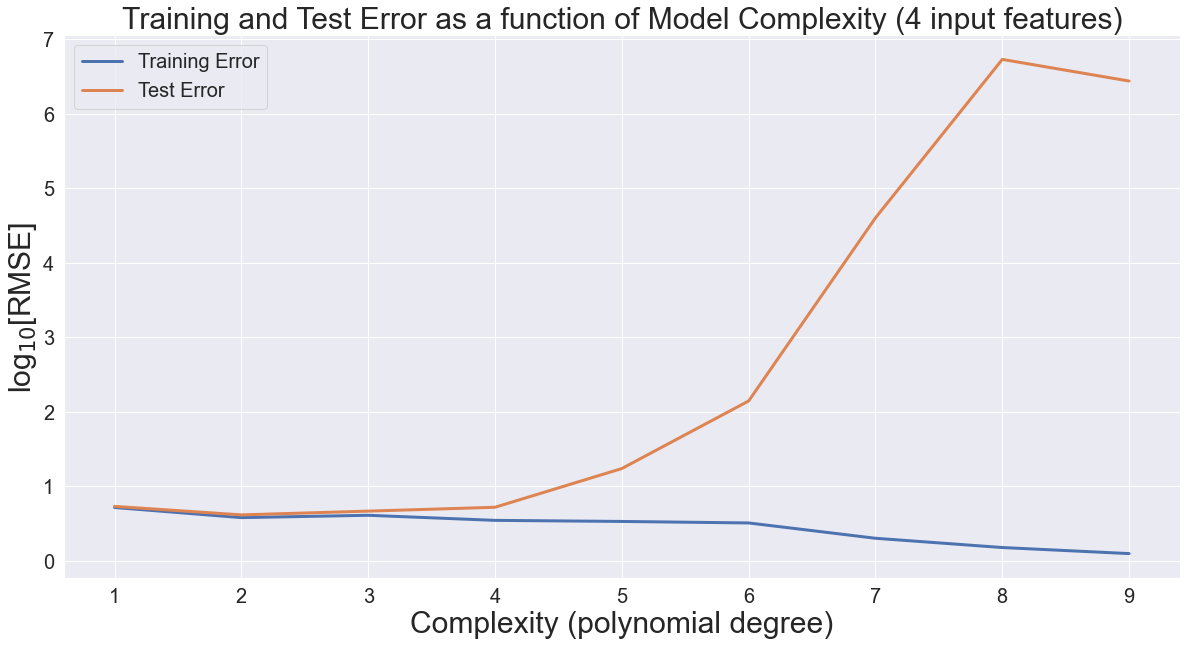

In [39]:
#plotting test an dtrain error vs compexity (2 features)

Maxpolydegree = 10 #setting highest degree for polynomial
trials =100
degrees=np.zeros(Maxpolydegree)

mse_test_4 = np.zeros(Maxpolydegree)
mse_train_4 = np.zeros(Maxpolydegree)
r2_test_4 = np.zeros(Maxpolydegree)
r2_train_4 = np.zeros(Maxpolydegree)

for degree in range(1,Maxpolydegree):
    degrees[degree] += degree
    poly = PolynomialFeatures(degree)
    X_4_ = poly.fit_transform(x_4) 
    
    # loop over trials in order to estimate the expectation value of the MSE
    mse_test_4[degree] = 0.0
    mse_train_4[degree] = 0.0
    r2_test_4[degree] = 0.0
    r2_train_4[degree] = 0.0
    
    for samples in range(trials):
        X_train_4_, X_test_4_, y_train_4_, y_test_4_ = train_test_split(X_4_ , y_4 , test_size=0.2) #splitting data
        
        #scaling with STANDARD SCALE
        scaler = StandardScaler()
        scaler.fit(X_train_4_)
        X_train_scaled_4_ = scaler.transform(X_train_4_)
        X_test_scaled_4_ = scaler.transform(X_test_4_)
        OLS_4_ = skl.LinearRegression().fit(X_train_scaled_4_, y_train_4_)
        ytilde_train_4_ = OLS_4_.predict(X_train_scaled_4_)
        ytilde_test_4_ = OLS_4_.predict(X_test_scaled_4_)
        
        #Computing Results
        mse_test_4[degree] += (np.sqrt(mean_squared_error(y_test_4_, ytilde_test_4_)))
        mse_train_4[degree] += (np.sqrt(mean_squared_error(y_train_4_, ytilde_train_4_)))
        r2_test_4[degree] += r2_score(y_test_4_, ytilde_test_4_)
        r2_train_4[degree] += r2_score(y_train_4_, ytilde_train_4_)
        
    #final result = expected/mean value    
    mse_test_4[degree] /= trials
    mse_train_4[degree] /= trials
    r2_test_4[degree] /= trials
    r2_train_4[degree] /= trials
    
    #printing results
    #print("MODEL PERFORMANCE WITH TWO INPUT FEATURES (LSTAT AND RM)")
    print("---------------------------------------------------------")
    print("\nDegree of polynomial: %3d"% degree)
    print("Root Mean squared error on training data: %.4f" % mse_train_4[degree])
    print("Root Mean squared error on test data: %.4f" % mse_test_4[degree])

fig_2 = plt.figure(figsize=(20,10))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(degrees, np.log10(mse_train_4), label='Training Error',linewidth=3)
plt.plot(degrees, np.log10(mse_test_4), label='Test Error',linewidth=3)
plt.xlabel('Complexity (polynomial degree)',fontsize=30)
plt.ylabel('log$_{10}$[RMSE]',fontsize=30)
plt.title('Training and Test Error as a function of Model Complexity (4 input features)',fontsize=30)
#fig_2.savefig("Boston_OLS_4_Train_Test_Error.jpg",dpi=150)
plt.legend(fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

## Plotting test and train error vs complexity
All (13) features

<ipython-input-40-dc3c68177bda>:59: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_train_all), label='Training Error',linewidth=3)
<ipython-input-40-dc3c68177bda>:60: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_test_all), label='Test Error',linewidth=3)


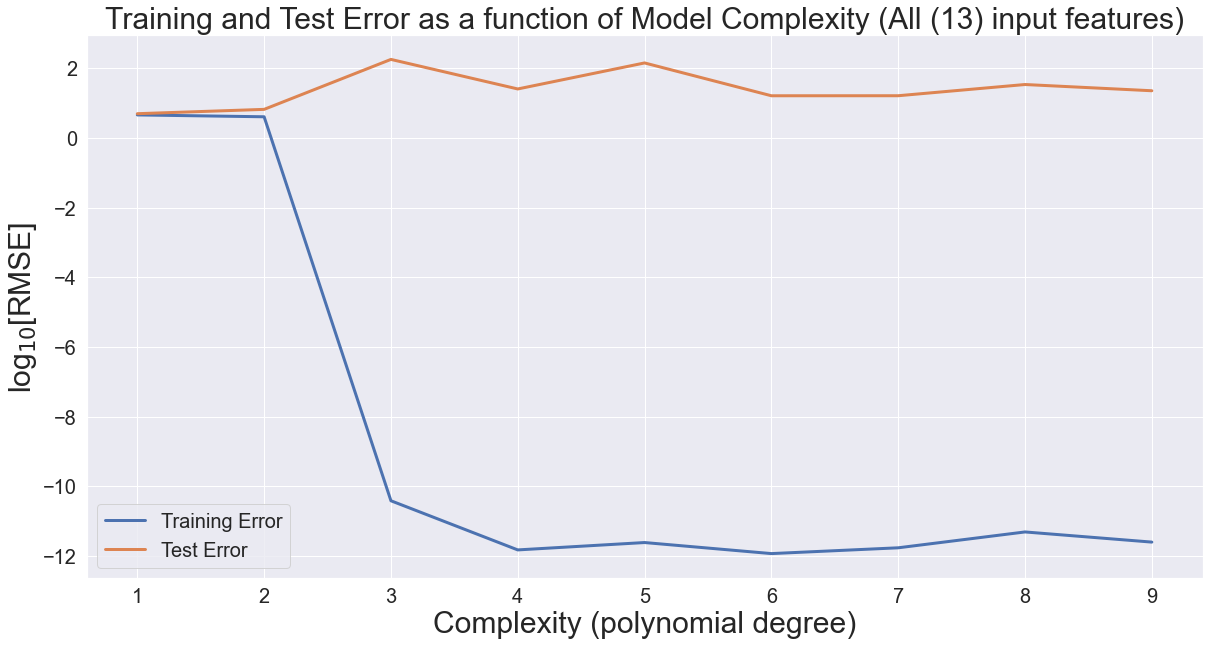

In [40]:
#Plotting test and train error vs complexity (13 features)

Maxpolydegree = 10 #setting highest degree for polynomial
trials =1 #higher number means more running time
degrees=np.zeros(Maxpolydegree)

mse_test_all = np.zeros(Maxpolydegree)
mse_train_all = np.zeros(Maxpolydegree)
r2_test_all = np.zeros(Maxpolydegree)
r2_train_all = np.zeros(Maxpolydegree)


for degree in range(1,Maxpolydegree):
    degrees[degree] += degree
    poly = PolynomialFeatures(degree) 
    X_all_ = poly.fit_transform(x_all)
    
    # loop over trials in order to estimate the expectation value of the MSE    
    mse_test_all[degree] = 0.0
    mse_train_all[degree] = 0.0
    r2_test_all[degree] = 0.0
    r2_train_all[degree] = 0.0
    
    for samples in range(trials):
        X_train_all_, X_test_all_, y_train_all_, y_test_all_ = train_test_split(X_all_ , y_all , test_size=0.2)
        
        #scaling with STANDARD SCALE
        scaled = StandardScaler()
        scaled.fit(X_train_all_)
        X_train_scaled_all_ = scaled.transform(X_train_all_)
        X_test_scaled_all_ = scaled.transform(X_test_all_)
        OLS_all_ = skl.LinearRegression().fit(X_train_scaled_all_, y_train_all_)
        ytilde_train_all_ = OLS_all_.predict(X_train_scaled_all_)
        ytilde_test_all_ = OLS_all_.predict(X_test_scaled_all_)
        
        #Computing Results
        mse_test_all[degree] += (np.sqrt(mean_squared_error(y_test_all_, ytilde_test_all_)))
        mse_train_all[degree] += (np.sqrt(mean_squared_error(y_train_all_, ytilde_train_all_)))
        r2_test_all[degree] += r2_score(y_test_all_, ytilde_test_all_)
        r2_train_all[degree] += r2_score(y_train_all_, ytilde_train_all_)
        
    #final result = expected/mean value        
    mse_test_all[degree] /= trials
    mse_train_all[degree] /= trials
    r2_test_all[degree] /= trials
    r2_train_all[degree] /= trials
    
#     #printing results
#     #print("\nMODEL PERFORMANCE WITH ALL 13 INPUT FEATURES")
#     print("-----------------------------------------------------")
#     print("\nDegree of polynomial: %3d"% degree)
#     print("Root Mean squared error on training data: %.4f" % mse_train_all[degree])
#     print("Root Mean squared error on test data: %.4f" % mse_test_all[degree])

fig_all = plt.figure(figsize=(20,10))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(degrees, np.log10(mse_train_all), label='Training Error',linewidth=3)
plt.plot(degrees, np.log10(mse_test_all), label='Test Error',linewidth=3)
plt.xlabel('Complexity (polynomial degree)',fontsize=30)
plt.ylabel('log$_{10}$[RMSE]',fontsize=30)
plt.title('Training and Test Error as a function of Model Complexity (All (13) input features)',fontsize=30)
plt.legend(fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
#fig_all.savefig("Boston_OLS_all_Train_Test_Error.jpg",dpi=150)
plt.show()

<ipython-input-41-9ece926911b7>:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(r2_train_all), label='Training R2',linewidth=3)
<ipython-input-41-9ece926911b7>:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(r2_test_all), label='Test R2',linewidth=3)
<ipython-input-41-9ece926911b7>:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(degrees, np.log10(r2_test_all), label='Test R2',linewidth=3)


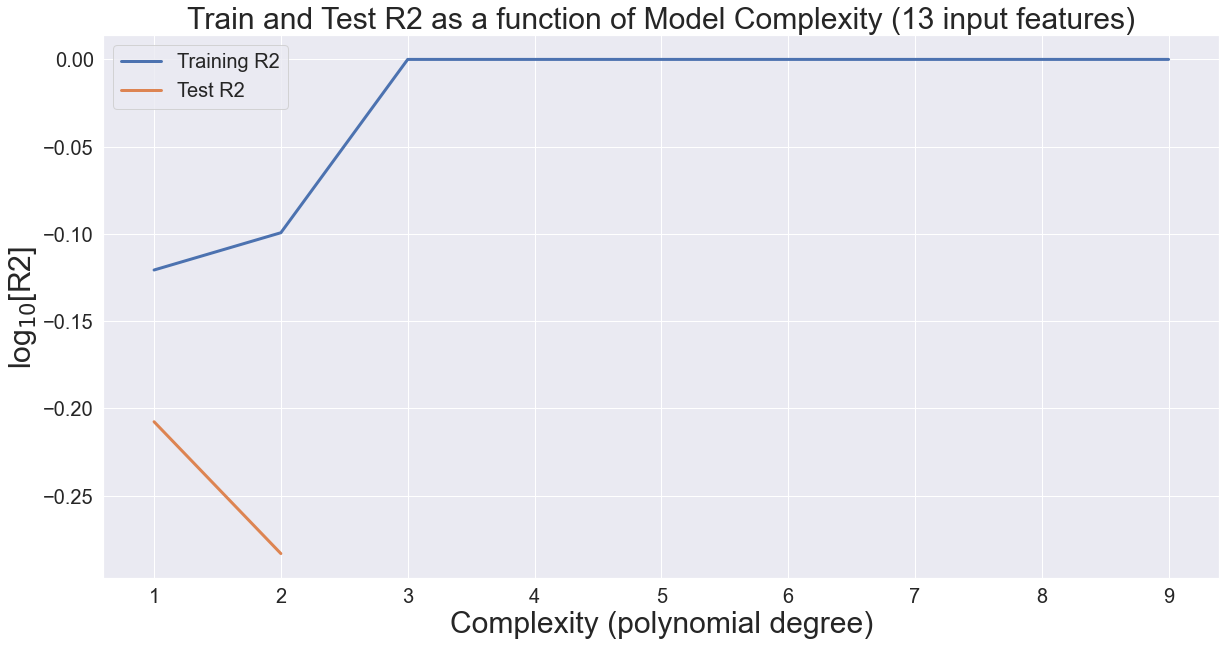

In [41]:
fig_all = plt.figure(figsize=(20,10))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.plot(degrees, np.log10(r2_train_all), label='Training R2',linewidth=3)
plt.plot(degrees, np.log10(r2_test_all), label='Test R2',linewidth=3)
plt.xlabel('Complexity (polynomial degree)',fontsize=30)
plt.ylabel('log$_{10}$[R2]',fontsize=30)
plt.title('Train and Test R2 as a function of Model Complexity (13 input features)',fontsize=30)
plt.legend(fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
#fig_all.savefig("Boston_OLS_all_Train_Test_R2.jpg",dpi=150)
plt.show()

## RIDGE
Two Features

<ipython-input-42-0016b53eab70>:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_train_2), label='Training Error',linewidth=3)
<ipython-input-42-0016b53eab70>:45: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_test_2), label='Test Error',linewidth=3)


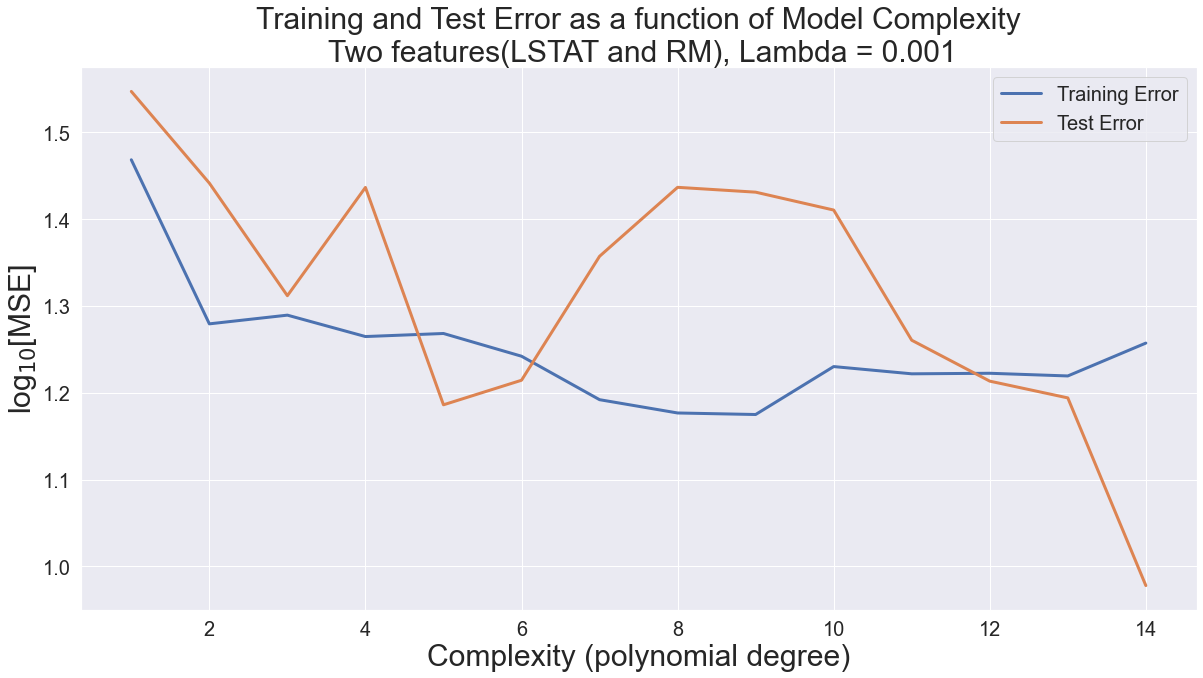

<ipython-input-42-0016b53eab70>:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_train_2), label='Training Error',linewidth=3)
<ipython-input-42-0016b53eab70>:45: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_test_2), label='Test Error',linewidth=3)


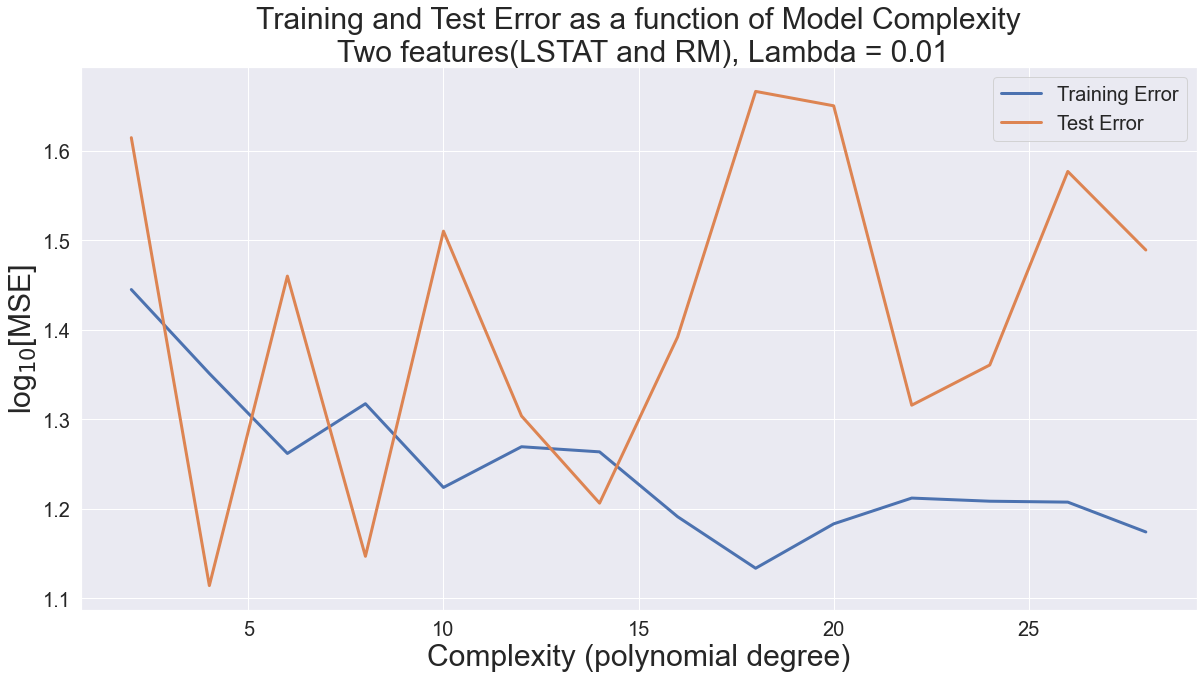

<ipython-input-42-0016b53eab70>:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_train_2), label='Training Error',linewidth=3)
<ipython-input-42-0016b53eab70>:45: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_test_2), label='Test Error',linewidth=3)


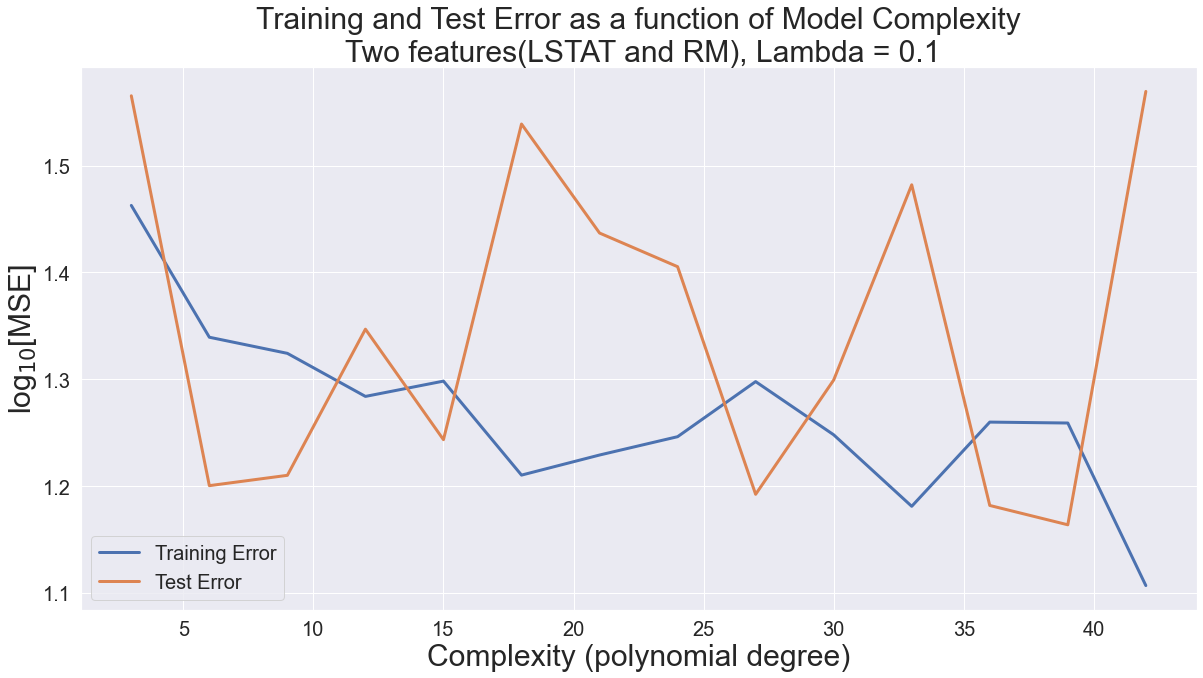

<ipython-input-42-0016b53eab70>:44: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_train_2), label='Training Error',linewidth=3)
<ipython-input-42-0016b53eab70>:45: RuntimeWarning: divide by zero encountered in log10
  plt.plot(degrees, np.log10(mse_test_2), label='Test Error',linewidth=3)


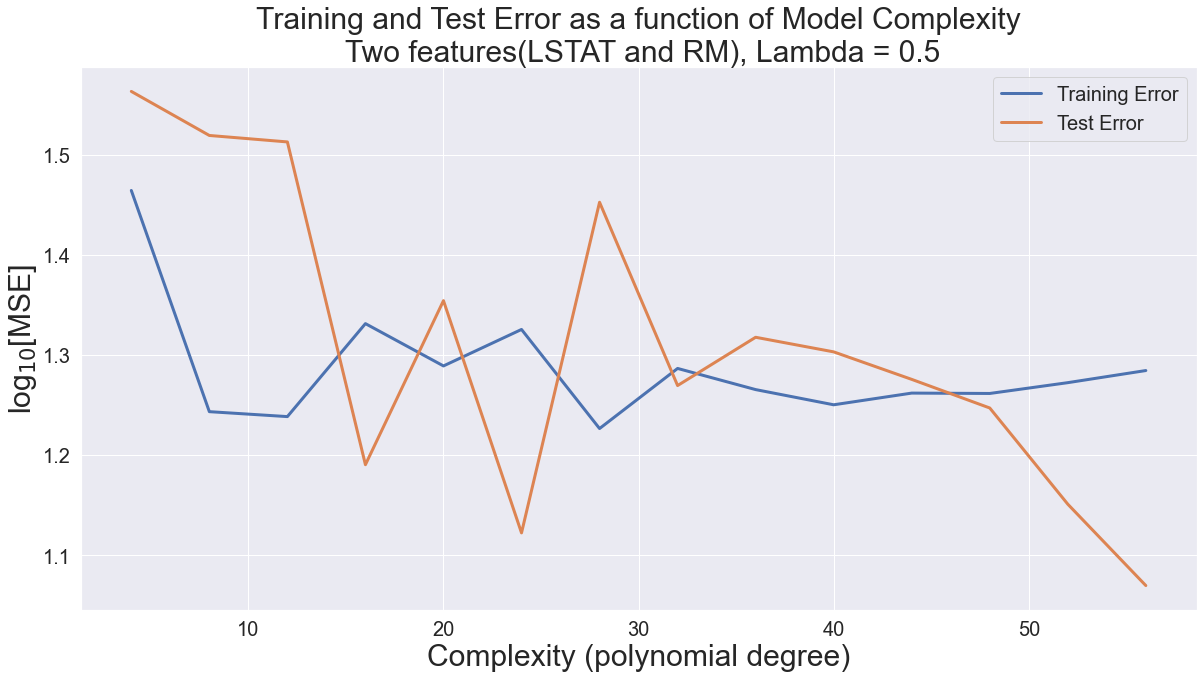

In [42]:
#Scaling and splitting of data included

Maxpolydegree = 15 #setting highest degree for polynomial
lambdas = [0.001,0.01,0.1,0.5]
mse_test_2 = np.zeros(Maxpolydegree)
mse_train_2 = np.zeros(Maxpolydegree)
r2_test_2 = np.zeros(Maxpolydegree)
r2_train_2 = np.zeros(Maxpolydegree)
degrees=np.zeros(Maxpolydegree)

for lamb in lambdas:
    for degree in range(1,Maxpolydegree):
        degrees[degree] += degree
        poly = PolynomialFeatures(degree) 
        X2 = poly.fit_transform(x_2)
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y_2,test_size=0.2) #splitting data
        # with scaling with STANDARD SCALE
        scaler = StandardScaler()
        scaler.fit(X_train2)
        X_train_scaled2 = scaler.transform(X_train2)
        X_test_scaled2 = scaler.transform(X_test2)
        X_train_scaled2[:,0] = 1 #to avoid singularity
        X_test_scaled2[:,0] = 1 #to avoid singularity
        ridge_model = skl.Ridge(alpha=lamb).fit(X_train_scaled2, y_train2)
        y_pred_train2 = ridge_model.predict(X_train_scaled2)
        y_pred_test2 = ridge_model.predict(X_test_scaled2)
        #Results
        mse_test_2[degree] = mean_squared_error(y_test2,y_pred_test2)
        mse_train_2[degree] = mean_squared_error(y_train2,y_pred_train2) 
        r2_test_2[degree] = r2_score(y_test2, y_pred_test2)
        r2_train_2[degree] = r2_score(y_train2, y_pred_train2)
        
#         print("\nLambda value: ", lamb)
#         print("\nDegree of polynomial: %3d"% degree)
#         print("Mean squared error on training data: %.4f" % mse_train[degree])
#         print("Mean squared error on test data: %.4f" % mse_test[degree])
        
    #PLOT TEST AND TRAINING ERROR VS COMPLEXITY
    fig1 = plt.figure(figsize=(20,10))
    axes = plt.gca()
    #axes.set_xlim([0,12])
    axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
    axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    plt.plot(degrees, np.log10(mse_train_2), label='Training Error',linewidth=3)
    plt.plot(degrees, np.log10(mse_test_2), label='Test Error',linewidth=3)
    plt.xlabel('Complexity (polynomial degree)',fontsize=30)
    plt.ylabel('log$_{10}$[MSE]',fontsize=30)
    plt.title('Training and Test Error as a function of Model Complexity\n Two features(LSTAT and RM), Lambda = %s'% lamb, fontsize=30)
    plt.legend(fontsize=20)
    fig1.savefig("Boston_Ridge_Train_Test_Error_%s .jpg"%lamb,dpi=150)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    #axes.grid(b=True, which='major', linestyle='-')
    plt.show()
        
# print("OBSERVATION") 
# print("--------------")
# print("The error in modelling the test data spikes increasingly and erratically with increase in the complexity of the model, while the training error decreases steadily ")
# print("The effect of lambda value is ...???")

## Bias Variance Trade-off with Ridge Regression

Polynomial degree: 0
Error: 92.50955689466879
Bias^2: 92.26976636567926
Var: 0.23979052898953274
92.50955689466879 >= 92.26976636567926 + 0.23979052898953274 = 92.50955689466879
Polynomial degree: 1
Error: 39.77981738404087
Bias^2: 39.462401195448685
Var: 0.3174161885921765
39.77981738404087 >= 39.462401195448685 + 0.3174161885921765 = 39.77981738404086
Polynomial degree: 2
Error: 26.629903766153397
Bias^2: 26.23284625557825
Var: 0.39705751057515704
26.629903766153397 >= 26.23284625557825 + 0.39705751057515704 = 26.629903766153404
Polynomial degree: 3
Error: 40.48286335374507
Bias^2: 39.64996291216294
Var: 0.8329004415821353
40.48286335374507 >= 39.64996291216294 + 0.8329004415821353 = 40.482863353745074
Polynomial degree: 4
Error: 48.041677598233704
Bias^2: 47.638943796801414
Var: 0.4027338014322966
48.041677598233704 >= 47.638943796801414 + 0.4027338014322966 = 48.04167759823371
Polynomial degree: 5
Error: 46.58720493442758
Bias^2: 45.586886253841705
Var: 1.0003186805858957
46.587204

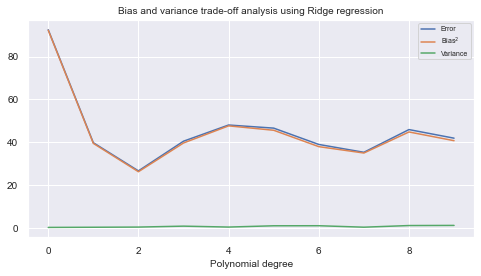

In [43]:
#with two features, the features that look more correlated with the MEDV
# Define a 2D design matrix
# Define a 2D design matrix
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)		# Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X
n_boostraps = 150
maxdegree = 10

x = pd.DataFrame(np.c_[ boston['RM']], columns = ['LSTAT'])
y = pd.DataFrame(np.c_[ boston['RM']], columns = ['RM'])
vals = np.concatenate(([x],[y]), axis=0).T 
#x = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
z = boston['MEDV']



error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

_lambda = 0.01
for degree in range(maxdegree):
    X = create_X(x,y,degree)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
    z_pred = np.empty((z_test.shape[0], n_boostraps))
    scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
    scaler.fit(X)
    X_scaled_test = scaler.transform(X_test)
    X_scaled_train = scaler.transform(X_train)
    for i in range(n_boostraps):
        X_, z_ = resample(X_scaled_train, z_train)
        clf_ridge = skl.Ridge(alpha=_lambda).fit(X_, z_)
        z_pred[:, i] = clf_ridge.predict(X_scaled_test).ravel()
           

    polydegree[degree] = degree
    error[degree] = np.mean(np.mean((np.array(z_test).reshape(z_test.shape[0],1) - z_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (np.array(z_test).reshape(z_test.shape[0],1) - np.mean(z_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(z_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))
       

fig3 = plt.figure(figsize=(8,4))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 10)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 10)
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='Bias$^{2}$')
plt.plot(polydegree, variance, label='Variance')
plt.xlabel('Polynomial degree',size=10)
plt.title('Bias and variance trade-off analysis using Ridge regression', fontsize = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(fontsize=7)
plt.show()

## Cross-validation with two features

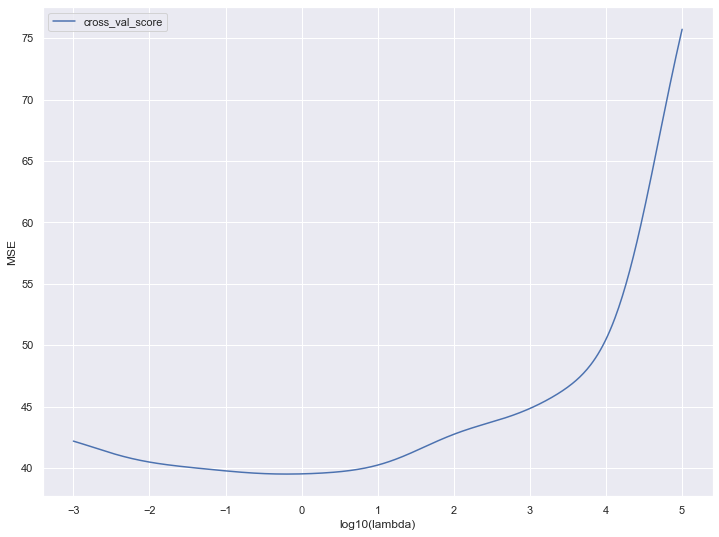

In [44]:
# A seed just to ensure that the random numbers are the same for every run.
np.random.seed(3155)
Maxpolydegree=10
x = pd.DataFrame(np.c_[ boston['RM']], columns = ['LSTAT'])
y = pd.DataFrame(np.c_[ boston['RM']], columns = ['RM'])
vals = np.concatenate(([x],[y]), axis=0).T 
#x = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
z = boston['MEDV']

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)
# Initialize a KFold instance
k = 10
kfold = KFold(n_splits = k)
estimated_mse_sklearn = np.zeros(nlambdas)

X = create_X(x,y,Maxpolydegree)
scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
scaler.fit(X)
X_scaled = scaler.transform(X)

i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    estimated_mse_folds = cross_val_score(ridge, X_scaled,z, scoring='neg_mean_squared_error', cv=kfold)
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)
    i += 1
plt.figure()
plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()




## Bias-variance trade-off with 2 features

In [ ]:
# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(2018)
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

n_boostraps = 150
maxdegree = 10


x = pd.DataFrame(np.c_[ boston['RM']], columns = ['LSTAT'])
y = pd.DataFrame(np.c_[ boston['RM']], columns = ['RM'])
vals = np.concatenate(([x],[y]), axis=0).T 
#x = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
z = boston['MEDV']


error = np.zeros(nlambdas)
bias = np.zeros(nlambdas)
variance = np.zeros(nlambdas)
lambda_ = np.zeros(nlambdas)
X = create_X(x,y,maxdegree)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
z_pred = np.empty((z_test.shape[0], n_boostraps))
scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
scaler.fit(X)
X_scaled_test = scaler.transform(X_test)
X_scaled_train = scaler.transform(X_train)

i=0
for lmb in lambdas:
    for j in range(n_boostraps):
        X_, z_ = resample(X_scaled_train, z_train)
        ridge = Ridge(alpha = lmb)
        clf_ridge = skl.Ridge(alpha=lmb).fit(X_, z_)
        z_pred[:, j] = clf_ridge.predict(X_scaled_test).ravel()
           
    lambda_[i] = lmb    
    error[i] = np.mean(np.mean((np.array(z_test).reshape(z_test.shape[0],1) - z_pred)**2, axis=1, keepdims=True) )
    bias[i] = np.mean( (np.array(z_test).reshape(z_test.shape[0],1) - np.mean(z_pred, axis=1, keepdims=True))**2 )
    variance[i] = np.mean( np.var(z_pred, axis=1, keepdims=True) )
    i += 1
   
   

fig3 = plt.figure(figsize=(8,4))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 10)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 10)
plt.plot(np.log10(lambdas), error, label='Error')
plt.plot(np.log10(lambdas), bias, label='Bias$^{2}$')
plt.xlabel('log10(Lambda)',size=10)
plt.title('Bias and variance trade-off analysis', fontsize = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(fontsize=7)
plt.show()

## Test and Train Error vs Model Complexity (OLS vs Ridge)

In [ ]:
#with two features, the features that look more correlated with the MEDV
# Define a 2D design matrix
# Define a 2D design matrix
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)		# Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

maxdegrees=10
mse_test = np.zeros(maxdegrees)
mse_train = np.zeros(maxdegrees)

mse_test_ridge = np.zeros(maxdegrees)
mse_train_ridge = np.zeros(maxdegrees)

x = pd.DataFrame(np.c_[ boston['RM']], columns = ['LSTAT'])
y = pd.DataFrame(np.c_[ boston['RM']], columns = ['RM'])
vals = np.concatenate(([x],[y]), axis=0).T 
#x = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
z = boston['MEDV']

_lambda=0.1
for p in range(1, maxdegrees):
    X = create_X(x,y,p)
    X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)
    scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf_ridge = skl.Ridge(alpha=_lambda).fit(X_train_scaled, z_train)
    zridge_train = clf_ridge.predict(X_train_scaled)
    zridge_test = clf_ridge.predict(X_test_scaled)
    mse_train_ridge[p] = mean_squared_error(zridge_train,z_train)
    mse_test_ridge[p] = mean_squared_error(zridge_test,z_test)
    clf = skl.LinearRegression().fit(X_train_scaled, z_train)
    z_pred_test = clf.predict(X_test_scaled)
    z_pred_train = clf.predict(X_train_scaled)
    mse_train[p] = mean_squared_error(z_pred_train,z_train)
    mse_test[p] = mean_squared_error(z_pred_test,z_test)

        
fig2 = plt.figure(figsize=(7,5))
axes = plt.gca()
axes.set_xlim([0,10])
axes.tick_params(axis = 'both', which = 'major', labelsize = 10)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 10)
plt.plot(np.arange(maxdegrees), (mse_train_ridge), label='Train data using ridge')    
plt.plot(np.arange(maxdegrees),  (mse_test_ridge), label='Test data using ridge')
plt.plot(np.arange(maxdegrees),(mse_train), label='Train data using lineal regression')    
plt.plot(np.arange(maxdegrees),  (mse_test), label='Test data using lineal regression')
plt.xlabel('Polynomial degree',size=10)
plt.ylabel('MSE',fontsize=10)

fig2.savefig("train-test-MSE.jpg", dpi=150)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(fontsize=10)
plt.show()

## Cross Validation (OLS vs Ridge)

In [ ]:
Maxpolydegree = 10

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(2018)


x = pd.DataFrame(np.c_[ boston['RM']], columns = ['LSTAT'])
y = pd.DataFrame(np.c_[ boston['RM']], columns = ['RM'])
vals = np.concatenate(([x],[y]), axis=0).T 
#x = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
z = boston['MEDV']

estimated_mse_sklearn = np.zeros(Maxpolydegree)
estimated_mse_sklearn_ridge = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
k =10
kfold = KFold(n_splits = k)

for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X = create_X(x,y,degree)
        OLS = LinearRegression()
        ridge = Ridge(alpha = _lambda)
        scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
        scaler.fit(X)
        X_scaled = scaler.transform(X)    
    
    estimated_mse_folds = cross_val_score(OLS, X_scaled,z, scoring='neg_mean_squared_error', cv=kfold)
    estimated_mse_folds_ridge = cross_val_score(ridge, X_scaled,z, scoring='neg_mean_squared_error', cv=kfold)
    
    estimated_mse_sklearn[polydegree] = np.mean(-estimated_mse_folds) 
    estimated_mse_sklearn_ridge[polydegree] = np.mean(-estimated_mse_folds_ridge)    
    
    

fig4 = plt.figure(figsize=(7,5))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 10)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 10)
plt.plot(polynomial, (estimated_mse_sklearn), label='Cross validation Test Error using linear regression')
plt.plot(polynomial, (estimated_mse_sklearn_ridge), label='Cross validation Test Error using ridge regression')
plt.xlabel('Polynomial degree',size=10)
plt.ylabel('MSE',size=10)
fig4.savefig("Bootstrap vs CV.jpg", dpi=150)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(fontsize=10)
plt.show()



## Bias-variance trade-off (OLS vs Ridge)

In [ ]:
#with two features, the features that look more correlated with the MEDV
# Define a 2D design matrix
# Define a 2D design matrix
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)		# Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X
n_boostraps = 150
maxdegree = 10

x = pd.DataFrame(np.c_[ boston['RM']], columns = ['LSTAT'])
y = pd.DataFrame(np.c_[ boston['RM']], columns = ['RM'])
vals = np.concatenate(([x],[y]), axis=0).T 
#x = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
z = boston['MEDV']



error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

_lambda = 0.01
for degree in range(maxdegree):
    X = create_X(x,y,degree)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
    z_pred = np.empty((z_test.shape[0], n_boostraps))
    scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
    scaler.fit(X)
    X_scaled_test = scaler.transform(X_test)
    X_scaled_train = scaler.transform(X_train)
    for i in range(n_boostraps):
        X_, z_ = resample(X_scaled_train, z_train)
        clf_ridge = skl.Ridge(alpha=_lambda).fit(X_, z_)
        z_pred[:, i] = clf_ridge.predict(X_scaled_test).ravel()
           

    polydegree[degree] = degree
    error[degree] = np.mean(np.mean((np.array(z_test).reshape(z_test.shape[0],1) - z_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (np.array(z_test).reshape(z_test.shape[0],1) - np.mean(z_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(z_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))
       

fig3 = plt.figure(figsize=(8,4))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 10)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 10)
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='Bias$^{2}$')
plt.xlabel('Polynomial degree',size=10)
plt.title('Bias and variance trade-off analysis using Ridge regression', fontsize = 10)
fig2.savefig("bias-variance.jpg", dpi=150)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(fontsize=7)
plt.show()

## Part f): Presentation
Plot your results from part e)(e.g. the test MSE or predictions vs. true).

At the end, you should present a critical evaluation of your results and discuss the applicability of these regression methods to the type of data presented here.​

In [ ]:
#with two features, the features that look more correlated with the MEDV
# Define a 2D design matrix
# Define a 2D design matrix
def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)		# Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

maxdegrees=10
mse_test = np.zeros(maxdegrees)
mse_train = np.zeros(maxdegrees)

mse_test_ridge = np.zeros(maxdegrees)
mse_train_ridge = np.zeros(maxdegrees)

x = pd.DataFrame(np.c_[ boston['RM']], columns = ['LSTAT'])
y = pd.DataFrame(np.c_[ boston['RM']], columns = ['RM'])
vals = np.concatenate(([x],[y]), axis=0).T 
#x = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
z = boston['MEDV']

_lambda=0.1

X = create_X(x,y,4)
X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)
scaler = StandardScaler() # Standardizes features by removing the mean and scaling to unit variance
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_ridge = skl.Ridge(alpha=_lambda).fit(X_train_scaled, z_train)
zridge_train = clf_ridge.predict(X_train_scaled)
zridge_test = clf_ridge.predict(X_test_scaled)
        
fig2 = plt.figure(figsize=(7,4))
axes = plt.gca()
#axes.set_xlim([0,10])
axes.tick_params(axis = 'both', which = 'major', labelsize = 10)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 10)
plt.plot(zridge_test, z_test,'bo')    
plt.xlabel('zridge_test',size=10)
plt.ylabel('z_test',fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()